<a href="https://colab.research.google.com/github/RaquelSMartins/Trabalho_Final_PCDAS/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/bigdata-icict/ETL-Dataiku-DSS/raw/master/tutoriais/pcdas_1.5.png">

### <font color="red"><b>**Nomes dos integrantes do grupo:**

*   Jenifer de Paula
*   Marcelo Rabaco
*   Raquel Martins
*   Rosane Correa

## Introdução
As febres virais constituem um grupo de doenças de alta incidência e
frequentemente relacionadas a agentes infecciosos em países tropicais. No contexto epidemiológico brasileiro, dentro desse grupo, destacam-se as arboviroses (DIAS, 2020). Neste projeto trabalharemos com febres virais, principalmente Dengue e Dengue hemorrágica, entre outras.
Há 40 anos, o Brasil sofre com sucessivas epidemias de Dengue que causam milhares de episódios de adoecimento, óbitos, sobrecarga dos serviços de saúde e prejuízos sociais e econômicos inestimáveis (SBIm; SBI; SBMT, 2023). Deste modo entende-se, portanto, a importância de monitorar os dados sobre as febres virais para elaborar ações que viabilizem a prevenção e controle dessas doenças.

### Justificativa
As febres virais, como Dengue, Zika e Chikungunya anualmente acometem milhares indivíduos em todo Brasil, acarretando internações e óbitos em todo o país. Em maio de 2023 o site do Ministério da Saúde publicou que até o final de abril, houve aumento de 30% no número de casos prováveis de dengue em comparação com o mesmo período de 2022 em todo Brasil. Já em relação à chikungunya, quando comparado ao mesmo período do ano passado, ocorreu um aumento de 40%. Em relação aos dados de Zika, até o final de abril, houve um aumento de 289% quando comparado ao mesmo período de 2022 (fote: https://www.gov.br/saude/pt-br/assuntos/noticias-para-os-estados/sao-paulo/2023/maio/sao-paulo-registrou-201-mil-casos-provaveis-de-dengue-em-2023-entre-janeiro-e-abr/il). Segundo o site Info Dengue, da Fundação Oswaldo Cruz, no período de  6 de agosto de 2022 a 5 de agosto de 2023, só no estado do Rio de Janeiro, o total de casos de Dengue foi de 76809 e de Zika foi de 295 (fonte: https://info.dengue.mat.br/alerta/RJ/dengue).
Dessa forma, torna-se importante estudar o desenvolvimento das febres virais no Rio de Janeiro, entendendo como as doenças afetam cada região/município estado, tendo em vista as diferenças geográficas e sóciodemográficas entre os municípios, visando melhorar as decisões de Saúde Pública de forma direcionar melhor os recursos financeiros e verificar as regiões onde o foco do combate deve ser mais intensificado.



### Objetivo

O objetivo do trabalho é fazer um estudo de geográfico dos casos de internação por febres virais que resultaram em óbitos no Estado do Rio de Janeiro no período entre 2010 a 2021, visando enterder melhor a distribuição os casos nos municípios tendo como base informações de posição geográfica, dos municípios de ocorrência e sóciodemográficos populacionais.

Objetivos específicos:

- Integrar as bases Pólis e SIHSUS da PCDAS.
- Realizar uma análise exploratória inicial dos dados.
- Utilizar um modelo de Clustering dos casos de óbitos e entender a distribuição dos grupos.
- Utilizar um modelo de predição dos grupos gerados pelo modelo de Clustering que foreça informações sobre a contribuição de cada atributo na formação do cluster, de modo auxiliar na interpretação dos resultados.
- Interpretar os resultados e explicar como os achados podem contribuir nas medidas de Saúde Pública.

###Carregando as bases de dados:
- Polis PCDAS
- Bases SIHSUS PCDAS - Selecionando mortes para cid-10 A90 - A99 da região Sudestes

In [309]:
# Fazendo conexão no drive
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import numpy as np

#carregando base do polis
df_polis = pd.read_csv('https://raw.githubusercontent.com/RaquelSMartins/Trabalho_Final_PCDAS/main/PolisPCDaS.csv')

df_polis.shape

(5570, 227)

In [310]:
df_polis.head(5)

,Unnamed: 0,COD_IBGE,POPULACAO_2019,qtd_obitos_ate_um_ano_2019,qtd_NASC_2019,qtd_nasc_7_mais_consultas_2019,qtd_nasc_baixo_peso_2019,qtd_OBITOS_2019,qtd_obitos_homicidio_2019,qtd_obitos_acidente_2019,qtd_obitos_suicidios_2019,qtd_obitos_agressoes_2019,qtd_obitos_maternos_2019,qtd_nasc_maes_10_14_2019,qtd_nasc_maes_15_17_2019,tx_mortalidade_infantil_2019,tx_nasc_7_mais_consultas_2019,tx_nasc_baixo_peso_2019,tx_obitos_2019,tx_obitos_homicidio_2019,tx_obitos_acidente_2019,tx_obitos_suicidio_2019,tx_obitos_agressoes_2019,tx_obitos_maternos_diretos_2019,tx_nasc_mae_10_14_2019,tx_nasc_mae_15_17_2019,PVA_AGR_2018,PVA_IND_2018,PVA_SERV_2018,PVA_ADM_2018,VAB_2018,IMP_PRDT_2018,PIB_2018,PIBPC_2018,ATV_VAB1_2018,ATV_VAB2_2018,ATV_VAB3_2018,vapc_2018,PESCADUNICO_TOT_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_SIT_POBREZA_07_2021,qtd_INTERNACOES_2019,int_drsai_2019,tx_interdrsai_2019,int_sap_2019,tx_intersap_2019,MSAU01_2018,MSAU10_2018,MSAU101A_2018,MSAU101B_2018,MSAU102_2018,MSAU111_2018,MSAU112_2018,MSAU113_2018,MSAU114_2018,MSAU12_2018,MSAU13_2018,MSAU141_2018,MSAU142_2018,MSAU143_2018,MSAU15_2018,MSAU1511_2018,MSAU1512_2018,MSAU1513_2018,MSAU1514_2018,MSAU1515_2018,MSAU1516_2018,MSAU1517_2018,MSAU1518_2018,MSAU1519_2018,MSAU161_2018,MSAU162_2018,MSAU163_2018,MSAU164_2018,MSAU165_2018,MSAU166_2018,MSAU167_2018,MSAU168_2018,MSAU169_2018,MSAU1610_2018,MSAU1611_2018,MSAU1612_2018,MSAU1613_2018,MSAU17_2018,MSAU18_2018,MSAU181_2018,MSAU19_2018,MSAU191_2018,MSAU20_2018,MSAU201_2018,MSAU21_2018,MSAU22_2018,MSAU2211_2018,MSAU2212_2018,MSAU2213_2018,MSAU2214_2018,MSAU2215_2018,MSAU2216_2018,MSAU2217_2018,MSAU23_2018,MSAU24_2018,MSAU25_2018,MSAU26_2018,MSAU271_2018,MSAU2711_2018,MSAU272_2018,MSAU2721_2018,MSAU273_2018,MSAU274_2018,MSAU2741_2018,MSAU275_2018,MSAU2751_2018,MSAU276_2018,MSAU2761_2018,MSAU277_2018,MSAU2771_2018,MSAU28_2018,MSAU281_2018,MSAU29_2018,MSAU2911_2018,MSAU2912_2018,MSAU2913_2018,MSAU2914_2018,MSAU2915_2018,MSAU30_2018,MSAU3011_2018,MSAU3012_2018,MSAU31_2018,MSAU3111_2018,MSAU3112_2018,MSAU3113_2018,MSAU3114_2018,MSAU3115_2018,MSAU3116_2018,MSAU321_2018,MSAU322_2018,MSAU323_2018,MSAU324_2018,MSAU325_2018,MSAU326_2018,MSAU33_2018,MSAU34_2018,MSAU35_2018,MSAU36_2018,MSAU37_2018,MSAU381_2018,MSAU382_2018,MSAU383_2018,MSAU384_2018,MSAU385_2018,MSAU386_2018,MSAU387_2018,MSAU388_2018,MSAU39_2018,MSAU3911_2018,MSAU3912_2018,MSAU3913_2018,MSAU3914_2018,MSAU3915_2018,MSAU3916_2018,MSAU3917_2018,MSAU3918_2018,MSAU3919_2018,MSAU40_2018,MSAU411_2018,MSAU412_2018,MSAU413_2018,MSAU414_2018,MSAU415_2018,MSAU416_2018,MSAU42_2018,MSAU43_2018,MSAU44_2018,MSAU456_2018,MSAU451_2018,MSAU452_2018,MSAU453_2018,MSAU454_2018,MSAU455_2018,MSAU46_2018,MSAU47_2018,MSAU48_2018,MSAU49_2018,MSAU491_2018,MSAU4911_2018,MSAU50_2018,MSAU501_2018,MSAU51_2018,MSAU51111_2018,MSAU51112_2018,MSAU51121_2018,MSAU51122_2018,MSAU51131_2018,MSAU51132_2018,MSAU521_2018,MSAU5211_2018,MSAU522_2018,MSAU5221_2018,MSAU53_2018,MSAU541_2018,MSAU542_2018,MSAU543_2018,MSAU544_2018,mun_MUNNOME,mun_MUNNOMEX,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,mun_UFCOD,mun_MSAUDCOD,mun_RSAUDCOD,mun_CSAUDCOD,mun_ANOEXT,mun_SUCESSOR,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO,uf_DESCRICAO,mun_coordenadas
0,0,110001,22945,3.0,367.0,260.0,26.0,140,8.0,6.0,5.0,8.0,0.0,5.0,22.0,8.174387,70.844687,7.084469,0.610155,0.034866,26.149488,21.791240,34.865984,0.0000,1.362398,5.994550,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,499305.982,21552.47,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária",20332.571,11241,547,3317,2063,4.866115,29.508051,18.352460,2225.0,79.0,3.550562,546.0,24.539326,Secretaria exclusiva,Sim,888,2008,Paritário,Sim,Sim,Sim,Sim,12,32,Não,Sim,-,Sim,Sim,Sim,Sim,Sim,Não,Não,Sim,Sim,Sim,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Não,Sim,Não,Sim,

**Campos para puxar do polis:**

MSAU412_2018 - Existência, ou não, na área da saúde, de programas ou ações, no município, voltados especificamente para população em situação de rua

MSAU33_2018 - Existência, ou não, de posto ou serviço regular de vacinação no município

MSAU326_2018 - Município não possui equipe do Programa de Saúde da Família ou da estrutura similar atendendo determinados grupos de pessoas

MSAU325_2018 - Existência, ou não, de equipe do Programa de Saúde da Família ou da estrutura similar atendendo, no município, outras comunidades e povos tradicionais

MSAU324_2018 - Existência, ou não, de equipe do Programa de Saúde da Família ou da estrutura similar atendendo, no município, população ribeirinha

MSAU323_2018 - Existência, ou não, de equipe do Programa de Saúde da Família ou da estrutura similar atendendo, no município, população em situação de rua

MSAU322_2018 - Existência, ou não, de equipe do Programa de Saúde da Família ou da estrutura similar atendendo, no município, povos indígenas

MSAU321_2018 - Existência, ou não, de equipe do Programa de Saúde da Família ou da estrutura similar atendendo, no município, comunidades quilombola

MSAU3116_2018 - Em caso de existência de estrutura similar ao do Programa de Saúde da Família, define a quantidade de médicos

MSAU3114_2018 - Em caso de existência de estrutura similar ao do Programa de Saúde da Família, define a quantidade de agentes comunitários de saúde

MSAU3113_2018 - Em caso de existência de estrutura similar ao do Programa de Saúde da Família, define a quantidade de enfermeiros

MSAU3112_2018 - Em caso de existência de estrutura similar ao do Programa de Saúde da Família, define a quantidade de auxiliares/técnicos de enfermagem

MSAU3111_2018 - Em caso de existência de estrutura similar ao do Programa de Saúde da Família, define a quantidade de equipes de saúde

MSAU28_2018 - Existência, ou não, de Programa de Agentes Comunitários de Saúde no município

tx_PESCADUNICO_SIT_POBREZA_07_2021 - Razão entre (Pessoas em situação de pobreza inscritas no Cadastro Único) e (Total de pessoas inscritas no Cadastro Único) em Julho de 2021

tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021 - Razão entre (Pessoas em situação de pobreza inscritas no Cadastro Único) e (Total de pessoas inscritas no Cadastro Único) em Julho de 2021

tx_PESCADUNICO_PCD_07_2021 - Razão entre (Pessoas com deficiência (PCD) inscritas no Cadastro Único) e (Total de pessoas inscritas no Cadastro Único) em Julho de 2021

PESCADUNICO_SIT_POBREZA_07_2021 - Pessoas em situação de pobreza inscritas no Cadastro Único em Julho de 2021

PESCADUNICO_SIT_EXT_POBREZA_07_2021 - Pessoas em situação de extrema pobreza inscritas no Cadastro Único em Julho de 2021

PESCADUNICO_PCD_07_2021 - Pessoas com deficiência (PCD) inscritas no Cadastro Único em Julho de 2021

PESCADUNICO_TOT_07_2021 - Total de pessoas inscritas no Cadastro Único em Julho de 2021

PIBPC_2018 - Produto Interno Bruto per capita, a preços correntes (R$ 1.000,00) no ano de 2018.

PIB_2018 - Produto Interno Bruto, a preços correntes (R$ 1.000,00) no ano de 2018

MSAU544_2018 - Município não realiza nenhum dos serviços de vigilância em saúde

MSAU543_2018 -  Existência, ou não, de controle de endemias no município

MSAU542_2018 - Existência, ou não, de vigilância epidemiológica no município

MSAU541_2018 - Existência, ou não, de vigilância sanitária no município

In [165]:
#criando um dataframe puxando só campos interessantes do estado do rio de janeiro

colunas_selecionadas = ['COD_IBGE','MSAU412_2018','MSAU33_2018','MSAU326_2018','MSAU325_2018','MSAU324_2018','MSAU323_2018',
                               'MSAU322_2018','MSAU321_2018','MSAU3116_2018','MSAU3114_2018','MSAU3113_2018','MSAU3112_2018','MSAU3111_2018',
                               'MSAU28_2018','MSAU20_2018','tx_PESCADUNICO_SIT_POBREZA_07_2021','tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021',
                               'tx_PESCADUNICO_PCD_07_2021','PESCADUNICO_SIT_POBREZA_07_2021','PESCADUNICO_SIT_EXT_POBREZA_07_2021',
                               'PESCADUNICO_PCD_07_2021','PESCADUNICO_TOT_07_2021','PIBPC_2018','MSAU544_2018','MSAU543_2018',
                               'MSAU542_2018','MSAU541_2018','uf_CODIGO']
df_polis_loc = df_polis[colunas_selecionadas]
df_polis_loc=df_polis_loc[(df_polis_loc['uf_CODIGO']==33)]
df_polis_rj = pd.DataFrame(df_polis_loc)
df_polis_rj['MUNIC_RES']=df_polis_rj['COD_IBGE'] #adicionando MUNIC_RES PARA JUNTAR NO MERGE DE BAIXO
df_polis_rj.head(5)



,COD_IBGE,MSAU412_2018,MSAU33_2018,MSAU326_2018,MSAU325_2018,MSAU324_2018,MSAU323_2018,MSAU322_2018,MSAU321_2018,MSAU3116_2018,MSAU3114_2018,MSAU3113_2018,MSAU3112_2018,MSAU3111_2018,MSAU28_2018,MSAU20_2018,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,MSAU544_2018,MSAU543_2018,MSAU542_2018,MSAU541_2018,uf_CODIGO,MUNIC_RES
3521,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33,330010
3522,330020,-,Sim,-,Não,Não,Não,Não,Sim,-,-,-,-,-,Não,Sim,13.475504,61.756057,7.625983,6736,30870,3812,49987,20480.15,-,Sim,Sim,Sim,33,330020
3523,330030,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24,-,Sim,Sim,Sim,33,330030
3524,330045,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,6.522151,71.931145,4.804185,13428,148094,9891,205883,15598.12,-,Sim,Sim,Sim,33,330045
3525,330060,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,17.750302,33.319122,4.014780,2498,4689,565,14073,20586.07,-,Sim,Sim,Sim,33,330060


In [166]:
df_polis_rj

,COD_IBGE,MSAU412_2018,MSAU33_2018,MSAU326_2018,MSAU325_2018,MSAU324_2018,MSAU323_2018,MSAU322_2018,MSAU321_2018,MSAU3116_2018,MSAU3114_2018,MSAU3113_2018,MSAU3112_2018,MSAU3111_2018,MSAU28_2018,MSAU20_2018,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,MSAU544_2018,MSAU543_2018,MSAU542_2018,MSAU541_2018,uf_CODIGO,MUNIC_RES
3521,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33,330010
3522,330020,-,Sim,-,Não,Não,Não,Não,Sim,-,-,-,-,-,Não,Sim,13.475504,61.756057,7.625983,6736,30870,3812,49987,20480.15,-,Sim,Sim,Sim,33,330020
3523,330030,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24,-,Sim,Sim,Sim,33,330030
3524,330045,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,6.522151,71.931145,4.804185,13428,148094,9891,205883,15598.12,-,Sim,Sim,Sim,33,330045
3525,330060,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,17.750302,33.319122,4.014780,2498,4689,565,14073,20586.07,-,Sim,Sim,Sim,33,330060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,330560,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,13.765808,51.132745,9.826221,1513,5620,1080,10991,21389.03,-,Sim,Sim,Sim,33,330560
5361,330575,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,6.142472,71.319008,5.451530,889,10322,789,14473,16249.55,-,Sim,Sim,Sim,33,330575
5362,330590,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Não,Sim,16.528093,57.974301,4.887881,656,2301,194,3969,18452.36,-,Sim,Sim,Sim,33,330590
5363,330610,Sim,Sim,-,Não,Não,Sim,Não,Sim,-,-,-,-,-,Sim,Sim,8.384996,58.793063,8.498784,2137,14984,2166,25486,33675.61,-,Sim,Sim,Sim,33,330610


In [311]:
#carregando base do SIHSUS
df_sihsus = pd.read_csv('https://raw.githubusercontent.com/RaquelSMartins/Trabalho_Final_PCDAS/main/datasus-sihsus-mortes_sudeste.csv')
df_sihsus.shape

(2014, 65)

In [312]:
df_sihsus.head(5)

,int_CODIGO_UF,DIAG_PRINC,def_morte,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_cap,def_diag_princ_grupo,def_diag_princ_subcat,int_NOME_UF,int_SIGLA_UF,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_marca_uci,def_raca_cor,def_financ,def_gestao,def_nat_jur,def_sexo,def_car_int,def_diarias_uti,CID_MORTE,CID_ASSO,CID_NOTIF,IDADE,COD_IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,ESPEC,MUNIC_MOV,INSTRU,def_instru,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,def_tpdisec1,def_tpdisec2,def_tpdisec3,def_tpdisec4,def_tpdisec5,def_tpdisec6,def_tpdisec7,def_tpdisec8,def_tpdisec9,res_REGIAO,int_REGIAO,UF_ZI,MUNIC_RES
0,31,A91,Com óbito,2020,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,MINAS GERAIS,MG,Januária,-18.579,-46.518002,832,3189.006104,-16.132999,-45.742001,498,2072.340088,Urucuia,3 dias,Não utilizou UCI,Amarela,Média e Alta Complexidade (MAC),Municipal planea assist,Fundação Privada,Masculino,Urgência,Sim,0000,0000,NaN,37,4,414.540009,0,0,2020,3,314800,0,None,J189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adquirido,None,None,None,None,None,None,None,None,Sudeste,Sudeste,314800,317052
1,31,A90,Com óbito,2020,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,MINAS GERAIS,MG,Governador Valadares,-18.782,-40.980000,212,682.827026,-18.782000,-40.980000,212,682.827026,Mantena,8 a 14 dias,Não utilizou UCI,Amarela,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Feminino,Urgência,Não,0000,0000,NaN,95,4,70.800003,12,13,2020,3,313960,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,313960,313960
2,31,A90,Com óbito,2020,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,MINAS GERAIS,MG,Divinópolis,-20.087,-45.293999,919,1129.364990,-20.087000,-45.293999,919,1129.364990,Santo Antônio do Monte,0 dias,Não utilizou UCI,None,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Feminino,Urgência,Não,0000,0000,NaN,48,4,52.599998,0,1,2020,3,316040,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,316040,316040
3,31,A91,Com óbito,2020,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,MINAS GERAIS,MG,Divinópolis,-20.139,-44.883999,712,708.908997,-20.139000,-44.883999,712,708.908997,Divinópolis,1 dia,Não utilizou UCI,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Masculino,Urgência,Sim,0000,0000,NaN,15,4,293.320007,0,0,2020,3,312230,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,312230,312230
4,31,A90,Com óbito,2020,DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CL...,TRATAMENTO DE TRANSTORNOS DAS VIAS BILIARES E ...,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,MINAS GERAIS,MG,Divinópolis,-19.736,-45.251999,769,1209.139038,-19.736000,-45.251999,769,1209.139038,Bom Despacho,1 dia,Não utilizou UCI,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Feminino,Urgência,Não,0000,0000,NaN,79,4,60.230000,1,2,2020,3,310740,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,310740,310740


### Método
Será utilizado o pipeline a seguir:

> Integração: Dados de origens diferentes devem ser integrados,

> Limpeza dos Dados: resolução de inconsistências,

> Tratamento de Missing Values,

> Transformação: normalização e suavização,

> Discretização: faz parte do processo de transformação, mas tem papel importante, especialmente com valores numéricos,

> Análise Exploratória da base,

> Redução: reduzir o volume com pouca alteração no resultado final,

> Clustering: aplicação de modelo de clustering com aplicação de algoritmo KMeans para a formação de grupos,

> Predição de grupos e avaliação de Feature Importance: aplicação de modelo XGBoost (árvores de Decisão - Random Forest) com busca por melhores parâmetros por Grid Search e posterior avaliação da importância das variáveis para a predição dos grupos, de modo a trazer maior interpretabilidade ao estudo.

Bibliotecas a serem utilizadas: pandas, numpy, matplotlib, pycarret, sklearn e imblearn.


###Integração da base:
> Juntar as duas bases de dados pelo campos só é possível utilizando maps se os valores forem únicos. Então será necessário criar váriais únicas com o número de mortes para cada uma das CID-10 A90 - A99 e depois juntar esta duas variáveis de baixo:

df_polis pegar a variável uf_CODIGO

df_sihsus pegar a variável int_CODIGO_UF.**negrito**

In [169]:
#df_sihsus['DIAG_PRINC']

In [170]:
#df_sihsus['DIAG_PRINC'].unique() #listar as variáveis únicas
#df_sihsus['DIAG_PRINC'].value_counts()


In [171]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [172]:
df_sihsus_rj=df_sihsus[(df_sihsus['int_SIGLA_UF']=='RJ')]
df_sihsus_rj.head(5) #base Rio de janeiro

,int_CODIGO_UF,DIAG_PRINC,def_morte,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_cap,def_diag_princ_grupo,def_diag_princ_subcat,int_NOME_UF,int_SIGLA_UF,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_marca_uci,def_raca_cor,def_financ,def_gestao,def_nat_jur,def_sexo,def_car_int,def_diarias_uti,CID_MORTE,CID_ASSO,CID_NOTIF,IDADE,COD_IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,ESPEC,MUNIC_MOV,INSTRU,def_instru,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,def_tpdisec1,def_tpdisec2,def_tpdisec3,def_tpdisec4,def_tpdisec5,def_tpdisec6,def_tpdisec7,def_tpdisec8,def_tpdisec9,res_REGIAO,int_REGIAO,UF_ZI,MUNIC_RES
27,33,A91,Com óbito,2020,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Metropolitana I,-22.764000,-43.398998,18,79.791000,-22.759001,-43.451000,25,523.888000,Nova Iguaçu,2 dias,Não utilizou UCI,Amarela,Média e Alta Complexidade (MAC),Municipal planea assist,Sociedade Empresária Limitada,Feminino,Urgência,Não,0000,0000,NaN,10,4,58.990002,2,3,2020,7,330045,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330045,330350
28,33,A90,Com óbito,2020,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Centro-Sul,-22.162001,-43.292999,275,580.802979,-22.162001,-43.292999,275,580.802979,Paraíba do Sul,1 dia,Não utilizou UCI,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Masculino,Urgência,Não,0000,0000,NaN,84,4,64.080002,0,2,2020,3,330370,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330370,330370
39,33,A90,Com óbito,2020,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Médio Paraíba,-22.523001,-44.104000,390,182.317001,-22.523001,-44.104000,390,182.317001,Volta Redonda,1 dia,Não utilizou UCI,Amarela,Média e Alta Complexidade (MAC),Municipal planea assist,Órgão Público do Poder Executivo Municipal,Feminino,Urgência,Não,0000,0000,NaN,64,4,56.549999,0,2,2020,3,330630,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330630,330630
40,33,A90,Com óbito,2020,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Médio Paraíba,-22.523001,-44.104000,390,182.317001,-22.523001,-44.104000,390,182.317001,Volta Redonda,1 dia,Não utilizou UCI,Amarela,Média e Alta Complexidade (MAC),Municipal planea assist,Órgão Público do Poder Executivo Municipal,Feminino,Urgência,Sim,0000,0000,NaN,56,4,170.309998,0,1,2020,3,330630,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330630,330630
41,33,A90,Com óbito,2020,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Marília,-22.420000,-44.290001,385,50.587002,-21.797001,-50.889999,485,247.940994,Osvaldo Cruz,1 dia,Não utilizou UCI,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,NaN,Masculino,Urgência,Não,0000,0000,NaN,47,4,52.599998,0,2,2020,3,330411,0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330411,353460


In [173]:
#df_sihsus['def_diag_princ_subcat'].unique() # listar as varias que com as definições das variáveis de cima (DIAG_PRINC)
#df_sihsus['def_diag_princ_subcat'].value_counts()

In [174]:
#SUDESTE
duplicatas_sudeste = df_sihsus.groupby(['DIAG_PRINC', 'def_diag_princ_subcat','int_NOME_UF','res_MUNNOME']).size().reset_index(name='Contagem')
duplicatas_sudeste.head(5)

,DIAG_PRINC,def_diag_princ_subcat,int_NOME_UF,res_MUNNOME,Contagem
0,A90,A90 Dengue,BAHIA,São Paulo,1
1,A90,A90 Dengue,ESPIRITO SANTO,Afonso Cláudio,2
2,A90,A90 Dengue,ESPIRITO SANTO,Aracruz,2
3,A90,A90 Dengue,ESPIRITO SANTO,Baixo Guandu,1
4,A90,A90 Dengue,ESPIRITO SANTO,Barra de São Francisco,3


In [175]:
#RIO DE JANEIRO - RAÇA, SEXO
duplicatas_rj_raca = df_sihsus_rj.groupby(['ano_internacao','res_MUNNOME','def_raca_cor','def_sexo', 'def_diag_princ_subcat']).size().reset_index(name='Contagem')
duplicatas_rj_raca.head(5)

,ano_internacao,res_MUNNOME,def_raca_cor,def_sexo,def_diag_princ_subcat,Contagem
0,2010,Barra Mansa,Branca,Masculino,A90 Dengue,1
1,2010,Belford Roxo,None,Feminino,A90 Dengue,1
2,2010,Belford Roxo,None,Masculino,A91 Febre hemorragica dev virus do dengue,1
3,2010,Campos dos Goytacazes,Branca,Masculino,A91 Febre hemorragica dev virus do dengue,1
4,2010,Campos dos Goytacazes,None,Feminino,A90 Dengue,2


In [176]:
#RIO DE JANEIRO - ANO INTERNAÇÃO
duplicatas_rj_ano = df_sihsus_rj.groupby(['ano_internacao','int_NOME_UF','res_MUNNOME','DIAG_PRINC', 'def_diag_princ_subcat']).size().reset_index(name='Contagem')
duplicatas_rj_ano.head(5)

,ano_internacao,int_NOME_UF,res_MUNNOME,DIAG_PRINC,def_diag_princ_subcat,Contagem
0,2010,RIO DE JANEIRO,Barra Mansa,A90,A90 Dengue,1
1,2010,RIO DE JANEIRO,Belford Roxo,A90,A90 Dengue,1
2,2010,RIO DE JANEIRO,Belford Roxo,A91,A91 Febre hemorragica dev virus do dengue,1
3,2010,RIO DE JANEIRO,Campos dos Goytacazes,A90,A90 Dengue,2
4,2010,RIO DE JANEIRO,Campos dos Goytacazes,A91,A91 Febre hemorragica dev virus do dengue,6


In [177]:
#RIO DE JANEIRO - DIGINÓTICO PRINCIPAL - ONDE FOI INTERNADO, RESIDÊNCIA
duplicatas_rj = df_sihsus_rj.groupby(['DIAG_PRINC','res_MUNNOME', 'def_diag_princ_subcat']).size().reset_index(name='Contagem')
duplicatas_rj.head(5)

,DIAG_PRINC,res_MUNNOME,def_diag_princ_subcat,Contagem
0,A90,Areal,A90 Dengue,1
1,A90,Barra Mansa,A90 Dengue,2
2,A90,Barra do Piraí,A90 Dengue,6
3,A90,Belford Roxo,A90 Dengue,5
4,A90,Bom Jardim,A90 Dengue,1


In [178]:
#RIO DE JANEIRO - Altitude
duplicatas_rj_altitude = df_sihsus_rj.groupby(['ano_internacao','res_MUNNOME','int_ALTITUDE', 'def_diag_princ_subcat']).size().reset_index(name='Contagem')
duplicatas_rj_altitude.head(5)


,ano_internacao,res_MUNNOME,int_ALTITUDE,def_diag_princ_subcat,Contagem
0,2010,Barra Mansa,381,A90 Dengue,1
1,2010,Belford Roxo,18,A91 Febre hemorragica dev virus do dengue,1
2,2010,Belford Roxo,25,A90 Dengue,1
3,2010,Campos dos Goytacazes,13,A90 Dengue,2
4,2010,Campos dos Goytacazes,13,A91 Febre hemorragica dev virus do dengue,6


In [179]:
#juntando as tabelas
pd_sihsus_rj_polis = pd.merge(df_sihsus_rj, df_polis_rj, how = 'right', on = 'MUNIC_RES')
pd_sihsus_rj_polis.shape

(384, 94)

In [180]:
pd_sihsus_rj_polis.head(5)

,int_CODIGO_UF,DIAG_PRINC,def_morte,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_cap,def_diag_princ_grupo,def_diag_princ_subcat,int_NOME_UF,int_SIGLA_UF,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_marca_uci,def_raca_cor,def_financ,def_gestao,def_nat_jur,def_sexo,def_car_int,def_diarias_uti,CID_MORTE,CID_ASSO,CID_NOTIF,IDADE,COD_IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,ESPEC,MUNIC_MOV,INSTRU,def_instru,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,def_tpdisec1,def_tpdisec2,def_tpdisec3,def_tpdisec4,def_tpdisec5,def_tpdisec6,def_tpdisec7,def_tpdisec8,def_tpdisec9,res_REGIAO,int_REGIAO,UF_ZI,MUNIC_RES,COD_IBGE,MSAU412_2018,MSAU33_2018,MSAU326_2018,MSAU325_2018,MSAU324_2018,MSAU323_2018,MSAU322_2018,MSAU321_2018,MSAU3116_2018,MSAU3114_2018,MSAU3113_2018,MSAU3112_2018,MSAU3111_2018,MSAU28_2018,MSAU20_2018,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,MSAU544_2018,MSAU543_2018,MSAU542_2018,MSAU541_2018,uf_CODIGO
0,33.0,A91,Com óbito,2014.0,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A91 Febre hemorragica dev virus do dengue,RIO DE JANEIRO,RJ,Baía da Ilha Grande,-23.007000,-44.318001,6.0,800.429993,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,1 dia,Não utilizou UCI,None,Média e Alta Complexidade (MAC),Municipal planea assist,Órgão Público do Poder Executivo Municipal,Masculino,Urgência,Não,A91,NaN,NaN,57.0,4.0,129.669998,0.0,2.0,2014.0,3.0,330010.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudeste,Sudeste,330010.0,330010,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33
1,33.0,A959,Com óbito,2018.0,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A95.9 Febre amarela NE,RIO DE JANEIRO,RJ,Baía da Ilha Grande,-22.903000,-43.208000,2.0,1182.296021,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,2 dias,Não utilizou UCI,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Fundação Federal,Feminino,Urgência,Não,0000,0000,NaN,67.0,4.0,45.310001,0.0,3.0,2018.0,3.0,330455.0,0.0,None,J410,R579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pré-existente,Adquirido,None,None,None,None,None,None,None,Sudeste,Sudeste,330455.0,330010,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330020,330020,-,Sim,-,Não,Não,Não,Não,Sim,-,-,-,-,-,Não,Sim,13.475504,61.756057,7.625983,6736,30870,3812,49987,20480.15,-,Sim,Sim,Sim,33
3,33.0,A90,Com óbito,2021.0,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,0 dias,Não utilizou UCI,None,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Masculino,Urgência,Não,0000,0000,NaN,50.0,4.0,55.980000,0.0,1.0,2021.0,3.0,330030.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330030.0,330030,330030,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,9.461577,51.3

In [181]:
pd_sihsus_rj_polis.to_csv('datasus-sihsus-e-polis-juntas.csv', index=False)

In [182]:
pd_sihsus_rj_polis.shape

(384, 94)

In [183]:
#Retirando as linhas em que o CÓDIGO DA UNIDADE DA FEDERAÇÃO não está preenchido.
pd_sihsus_rj_polis_limpo1 = pd_sihsus_rj_polis.dropna(subset='int_CODIGO_UF')
pd_sihsus_rj_polis_limpo1.head(5)

,int_CODIGO_UF,DIAG_PRINC,def_morte,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_cap,def_diag_princ_grupo,def_diag_princ_subcat,int_NOME_UF,int_SIGLA_UF,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_marca_uci,def_raca_cor,def_financ,def_gestao,def_nat_jur,def_sexo,def_car_int,def_diarias_uti,CID_MORTE,CID_ASSO,CID_NOTIF,IDADE,COD_IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,ESPEC,MUNIC_MOV,INSTRU,def_instru,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,def_tpdisec1,def_tpdisec2,def_tpdisec3,def_tpdisec4,def_tpdisec5,def_tpdisec6,def_tpdisec7,def_tpdisec8,def_tpdisec9,res_REGIAO,int_REGIAO,UF_ZI,MUNIC_RES,COD_IBGE,MSAU412_2018,MSAU33_2018,MSAU326_2018,MSAU325_2018,MSAU324_2018,MSAU323_2018,MSAU322_2018,MSAU321_2018,MSAU3116_2018,MSAU3114_2018,MSAU3113_2018,MSAU3112_2018,MSAU3111_2018,MSAU28_2018,MSAU20_2018,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,MSAU544_2018,MSAU543_2018,MSAU542_2018,MSAU541_2018,uf_CODIGO
0,33.0,A91,Com óbito,2014.0,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A91 Febre hemorragica dev virus do dengue,RIO DE JANEIRO,RJ,Baía da Ilha Grande,-23.007000,-44.318001,6.0,800.429993,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,1 dia,Não utilizou UCI,None,Média e Alta Complexidade (MAC),Municipal planea assist,Órgão Público do Poder Executivo Municipal,Masculino,Urgência,Não,A91,NaN,NaN,57.0,4.0,129.669998,0.0,2.0,2014.0,3.0,330010.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudeste,Sudeste,330010.0,330010,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33
1,33.0,A959,Com óbito,2018.0,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A95.9 Febre amarela NE,RIO DE JANEIRO,RJ,Baía da Ilha Grande,-22.903000,-43.208000,2.0,1182.296021,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,2 dias,Não utilizou UCI,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Fundação Federal,Feminino,Urgência,Não,0000,0000,NaN,67.0,4.0,45.310001,0.0,3.0,2018.0,3.0,330455.0,0.0,None,J410,R579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pré-existente,Adquirido,None,None,None,None,None,None,None,Sudeste,Sudeste,330455.0,330010,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33
3,33.0,A90,Com óbito,2021.0,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,0 dias,Não utilizou UCI,None,Média e Alta Complexidade (MAC),Municipal planea assist,Associação Privada,Masculino,Urgência,Não,0000,0000,NaN,50.0,4.0,55.980000,0.0,1.0,2021.0,3.0,330030.0,0.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,Sudeste,Sudeste,330030.0,330030,330030,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24,-,Sim,Sim,Sim,33
4,33.0,A90,Com óbito,2021.0,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,NaN,RIO DE JANEIRO,RJ,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,0 dias,Não utilizo

In [184]:
pd_sihsus_rj_polis_limpo1.shape

(356, 94)

###Limpeza dos dados e tratamento de Missing Values:

In [185]:
pd_sihsus_rj_polis_limpo1.isna().sum()

int_CODIGO_UF                               0
DIAG_PRINC                                  0
def_morte                                   0
ano_internacao                              0
def_procedimento_realizado                  0
def_procedimento_solicitado                 0
def_diag_princ_cap                          0
def_diag_princ_grupo                        0
def_diag_princ_subcat                      11
int_NOME_UF                                 0
int_SIGLA_UF                                0
def_rsaud_res                               0
int_LATITUDE                                0
int_LONGITUDE                               0
int_ALTITUDE                                0
int_AREA                                    0
res_LATITUDE                                0
res_LONGITUDE                               0
res_ALTITUDE                                0
res_AREA                                    0
res_MUNNOME                                 0
def_dias_perm                     

In [186]:
#Retirando as linhas em que a coluna "def_diag_princ_subcat" não está preenchida.
indices = pd_sihsus_rj_polis_limpo1[pd_sihsus_rj_polis_limpo1["def_diag_princ_subcat"].isna()].index
pd_sihsus_rj_polis_limpo1.drop(indices)
pd_sihsus_rj_polis_limpo2 = pd_sihsus_rj_polis_limpo1.drop(indices)
pd_sihsus_rj_polis_limpo2.shape

(345, 94)

In [187]:
#Retirando as colunas com muitos valores faltantes.

limitPer = len(pd_sihsus_rj_polis_limpo2) * .95
pd_sihsus_rj_polis_limpo3 = pd_sihsus_rj_polis_limpo2.dropna(thresh=limitPer, axis=1)
pd_sihsus_rj_polis_limpo3.shape

(345, 72)

In [188]:
pd_sihsus_rj_polis_limpo3.columns

Index(['int_CODIGO_UF', 'DIAG_PRINC', 'def_morte', 'ano_internacao',
       'def_procedimento_realizado', 'def_procedimento_solicitado',
       'def_diag_princ_cap', 'def_diag_princ_grupo', 'def_diag_princ_subcat',
       'int_NOME_UF', 'int_SIGLA_UF', 'def_rsaud_res', 'int_LATITUDE',
       'int_LONGITUDE', 'int_ALTITUDE', 'int_AREA', 'res_LATITUDE',
       'res_LONGITUDE', 'res_ALTITUDE', 'res_AREA', 'res_MUNNOME',
       'def_dias_perm', 'def_raca_cor', 'def_financ', 'def_gestao', 'def_sexo',
       'def_car_int', 'def_diarias_uti', 'CID_MORTE', 'IDADE', 'COD_IDADE',
       'US_TOT', 'DIAR_ACOM', 'QT_DIARIAS', 'ANO_CMPT', 'ESPEC', 'MUNIC_MOV',
       'INSTRU', 'def_instru', 'res_REGIAO', 'int_REGIAO', 'UF_ZI',
       'MUNIC_RES', 'COD_IBGE', 'MSAU412_2018', 'MSAU33_2018', 'MSAU326_2018',
       'MSAU325_2018', 'MSAU324_2018', 'MSAU323_2018', 'MSAU322_2018',
       'MSAU321_2018', 'MSAU3116_2018', 'MSAU3114_2018', 'MSAU3113_2018',
       'MSAU3112_2018', 'MSAU3111_2018', 'MSAU28_2018

In [189]:
#Removendo a coluna "def_instru", pois ela está toda preenchida com a palavra "None".
pd_sihsus_rj_polis_limpo3['def_instru'].value_counts()

None    345
Name: def_instru, dtype: int64

In [190]:
pd_sihsus_rj_polis_limpo4 = pd_sihsus_rj_polis_limpo3.drop(['def_instru'], axis=1)
pd_sihsus_rj_polis_limpo4.shape

(345, 71)

In [191]:
pd_sihsus_rj_polis_limpo4.head(5)

,int_CODIGO_UF,DIAG_PRINC,def_morte,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_cap,def_diag_princ_grupo,def_diag_princ_subcat,int_NOME_UF,int_SIGLA_UF,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_raca_cor,def_financ,def_gestao,def_sexo,def_car_int,def_diarias_uti,CID_MORTE,IDADE,COD_IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,ESPEC,MUNIC_MOV,INSTRU,res_REGIAO,int_REGIAO,UF_ZI,MUNIC_RES,COD_IBGE,MSAU412_2018,MSAU33_2018,MSAU326_2018,MSAU325_2018,MSAU324_2018,MSAU323_2018,MSAU322_2018,MSAU321_2018,MSAU3116_2018,MSAU3114_2018,MSAU3113_2018,MSAU3112_2018,MSAU3111_2018,MSAU28_2018,MSAU20_2018,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,MSAU544_2018,MSAU543_2018,MSAU542_2018,MSAU541_2018,uf_CODIGO
0,33.0,A91,Com óbito,2014.0,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A91 Febre hemorragica dev virus do dengue,RIO DE JANEIRO,RJ,Baía da Ilha Grande,-23.007000,-44.318001,6.0,800.429993,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,1 dia,None,Média e Alta Complexidade (MAC),Municipal planea assist,Masculino,Urgência,Não,A91,57.0,4.0,129.669998,0.0,2.0,2014.0,3.0,330010.0,0.0,Sudeste,Sudeste,330010.0,330010,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33
1,33.0,A959,Com óbito,2018.0,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A95.9 Febre amarela NE,RIO DE JANEIRO,RJ,Baía da Ilha Grande,-22.903000,-43.208000,2.0,1182.296021,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,2 dias,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Feminino,Urgência,Não,0000,67.0,4.0,45.310001,0.0,3.0,2018.0,3.0,330455.0,0.0,Sudeste,Sudeste,330455.0,330010,330010,Sim,Sim,-,Não,Não,Sim,Sim,Sim,-,-,-,-,-,Sim,Sim,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,-,Sim,Sim,Sim,33
7,33.0,A90,Com óbito,2011.0,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A90 Dengue,RIO DE JANEIRO,RJ,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,1 dia,Preta,Média e Alta Complexidade (MAC),Municipal planea assist,Masculino,Urgência,Sim,A90,53.0,4.0,461.790009,0.0,1.0,2011.0,3.0,330030.0,0.0,Sudeste,Sudeste,330030.0,330030,330030,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24,-,Sim,Sim,Sim,33
8,33.0,A920,Com óbito,2011.0,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A92.0 Febre de Chikungunya,RIO DE JANEIRO,RJ,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,0 dias,Branca,Média e Alta Complexidade (MAC),Municipal planea assist,Masculino,Urgência,Não,A920,14.0,4.0,105.089996,0.0,1.0,2011.0,7.0,330030.0,0.0,Sudeste,Sudeste,330030.0,330030,330030,-,Sim,Sim,-,-,-,-,-,-,-,-,-,-,Sim,Sim,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24,-,Sim,Sim,Sim,33
9,33.0,A90,Com óbito,2011.0,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,I. Algumas doenças infecciosas e parasitárias,Febres por arbovírus e febres hemorrágicas virais,A90 Dengue,RIO DE JANEIRO,RJ,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Pira

In [192]:
#As colunas "int_CODIGO_UF" e "int_NOME_UF" possuem a mesma informação, portanto teremos que remover uma delas.
pd_sihsus_rj_polis_limpo5 = pd_sihsus_rj_polis_limpo4.drop(["int_CODIGO_UF"], axis = 1)
pd_sihsus_rj_polis_limpo5.shape

(345, 70)

Observando conjunto de colunas a seguir:
MSAU412_2018,
MSAU33_2018,
MSAU326_2018,
MSAU325_2018,
MSAU324_2018,
MSAU323_2018,
MSAU322_2018,
MSAU321_2018,
MSAU3116_2018,
MSAU3114_2018,
MSAU3113_2018,
MSAU3112_2018,
MSAU3111_2018,
MSAU28_2018 e
MSAU20_2018,
vimos que havia muitos valores preenchidos com "-", portanto decidimos investigar esse conjunto de variáveis mais afundo para decidir se iríamos eliminar essas colunas ou se haveria uma forma de preencher os valores faltantes ("-").


In [193]:
pd_sihsus_rj_polis_limpo5['MSAU412_2018'].value_counts()

Sim    207
-      118
Não     20
Name: MSAU412_2018, dtype: int64

In [194]:
pd_sihsus_rj_polis_limpo5['MSAU33_2018'].value_counts()

Sim    345
Name: MSAU33_2018, dtype: int64

In [195]:
pd_sihsus_rj_polis_limpo5['MSAU326_2018'].value_counts()

-      221
Sim    124
Name: MSAU326_2018, dtype: int64

In [196]:
pd_sihsus_rj_polis_limpo5['MSAU325_2018'].value_counts()

Não    148
-      124
Sim     73
Name: MSAU325_2018, dtype: int64

In [197]:
pd_sihsus_rj_polis_limpo5['MSAU324_2018'].value_counts()

Não    220
-      124
Sim      1
Name: MSAU324_2018, dtype: int64

In [198]:
pd_sihsus_rj_polis_limpo5['MSAU323_2018'].value_counts()

Sim    198
-      124
Não     23
Name: MSAU323_2018, dtype: int64

In [199]:
pd_sihsus_rj_polis_limpo5['MSAU322_2018'].value_counts()

Não    200
-      124
Sim     21
Name: MSAU322_2018, dtype: int64

In [200]:
pd_sihsus_rj_polis_limpo5['MSAU321_2018'].value_counts()

-      124
Sim    116
Não    105
Name: MSAU321_2018, dtype: int64

In [201]:
pd_sihsus_rj_polis_limpo5['MSAU3116_2018'].value_counts()

-     343
12      2
Name: MSAU3116_2018, dtype: int64

In [202]:
pd_sihsus_rj_polis_limpo5['MSAU3114_2018'].value_counts()

-    343
7      2
Name: MSAU3114_2018, dtype: int64

In [203]:
pd_sihsus_rj_polis_limpo5['MSAU3113_2018'].value_counts()

-     343
12      2
Name: MSAU3113_2018, dtype: int64

In [204]:
pd_sihsus_rj_polis_limpo5['MSAU3112_2018'].value_counts()

-     343
30      2
Name: MSAU3112_2018, dtype: int64

In [205]:
pd_sihsus_rj_polis_limpo5['MSAU3111_2018'].value_counts()

-     343
12      2
Name: MSAU3111_2018, dtype: int64

In [206]:
pd_sihsus_rj_polis_limpo5['MSAU28_2018'].value_counts()

Sim    311
Não     34
Name: MSAU28_2018, dtype: int64

In [207]:
pd_sihsus_rj_polis_limpo5['MSAU20_2018'].value_counts()

Sim    345
Name: MSAU20_2018, dtype: int64

In [208]:
#Devido à baixa variação entre as linhas e muitas linhas preenchidas com hífen ou 0000, as colunas abaixo foram removidas do data frame.
#A coluna COD_IDADE também foi removida, pois a coluna IDADE fornecia a informação de idade com maior detalhe.
# A res_MUNNOME foi removida porque ela carrega o nome do município de residência do indivíduo. Essa informação também está contida na coluna MUNIC_RES, mas no formato de código do município.
#A coluna COD_IBGE foi removida, pois ela está em redundância com a coluna MUNIC_RES.

pd_sihsus_rj_polis_limpo6 = pd_sihsus_rj_polis_limpo5.drop(["COD_IBGE", "INSTRU", "MSAU542_2018", "MSAU543_2018",	"MSAU541_2018", "MSAU412_2018", "MSAU326_2018", "MSAU325_2018", "MSAU324_2018", "MSAU323_2018", "MSAU322_2018", "MSAU321_2018", "res_REGIAO", "int_REGIAO", "COD_IDADE", "CID_MORTE", "def_financ", "def_diag_princ_grupo", "def_diag_princ_cap","uf_CODIGO","int_NOME_UF", "int_SIGLA_UF", "ESPEC", "def_morte", "MSAU544_2018", "MSAU33_2018", "MSAU20_2018", "MSAU28_2018", "MSAU3111_2018", "MSAU3112_2018", "MSAU3113_2018", "MSAU3114_2018", "MSAU3116_2018"], axis=1)

pd_sihsus_rj_polis_limpo6.shape

(345, 37)

###Análise Exploratória:

In [209]:
#Importando biblioteca matplotlib
import matplotlib.pyplot as plt

def plot_graph(df, bins, title, x_label, y_label):
  df.hist(bins=bins, figsize=(5, 3))
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

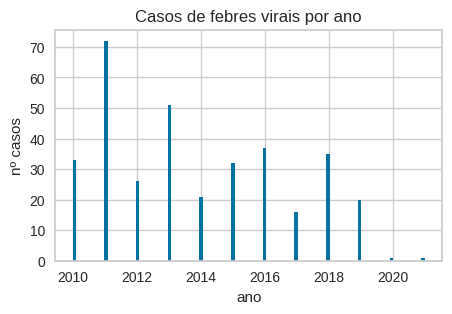

In [210]:
plot_graph(pd_sihsus_rj_polis_limpo6.ano_internacao, bins=100, title='Casos de febres virais por ano', x_label='ano', y_label='nº casos')

A maior parte dos indivíduos da coorte foram internados no ano de 2010.

<Axes: title={'center': 'Casos de mortes por febres virais'}>

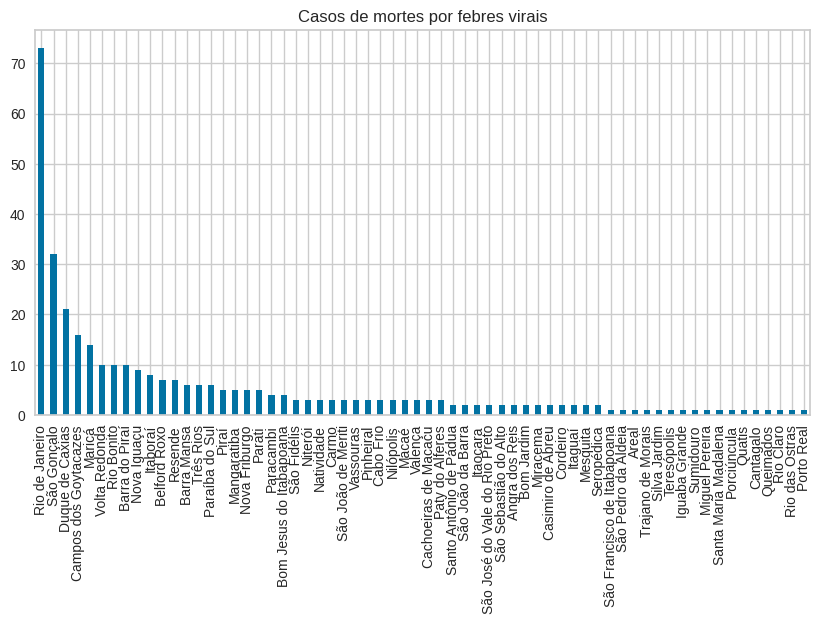

In [302]:
pd_sihsus_rj_polis_limpo6["res_MUNNOME"].value_counts().plot(kind="bar", title='Casos de mortes por febres virais', figsize= (10, 5))

<Axes: title={'center': 'Taxa de pobreza e número de óbitos por município'}, xlabel='res_MUNNOME'>

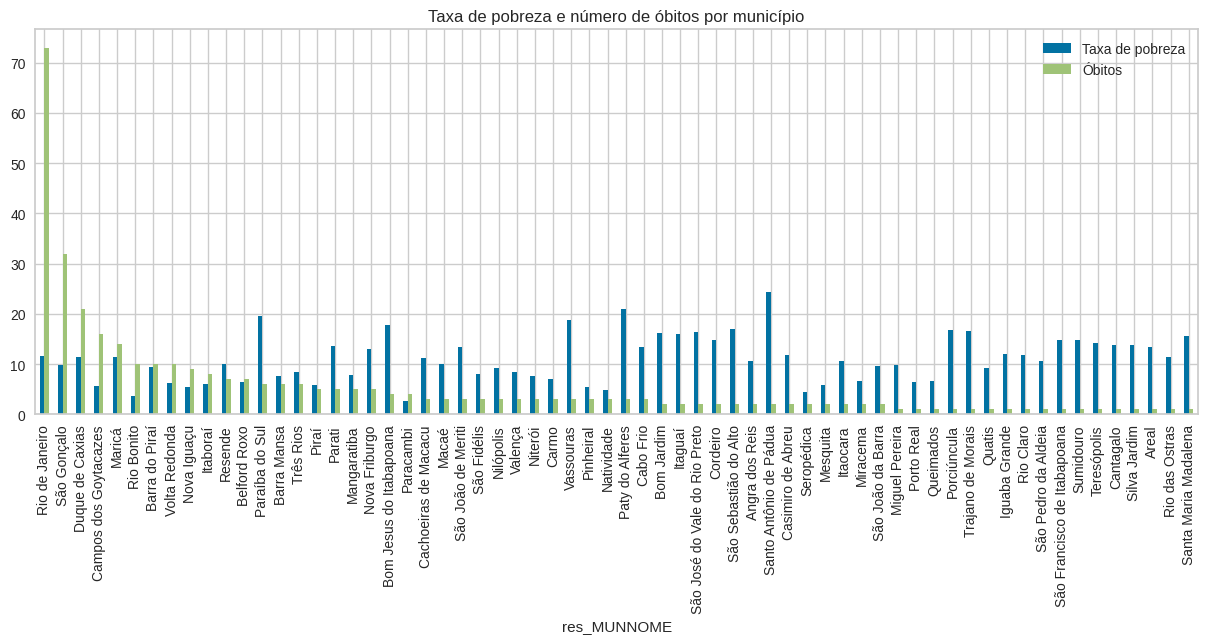

In [301]:
mun_pobreza_obitos = pd.DataFrame(pd_sihsus_rj_polis_limpo6[["tx_PESCADUNICO_SIT_POBREZA_07_2021", "res_MUNNOME"]].value_counts()).reset_index().rename(columns={0: 'Óbitos', 'tx_PESCADUNICO_SIT_POBREZA_07_2021': 'Taxa de pobreza'})
mun_pobreza_obitos = mun_pobreza_obitos.set_index("res_MUNNOME")
mun_pobreza_obitos.plot(kind="bar", figsize= (15, 5), title= 'Taxa de pobreza e número de óbitos por município')

<Axes: title={'center': 'Taxa de pobreza extrema e número de óbitos por município'}, xlabel='res_MUNNOME'>

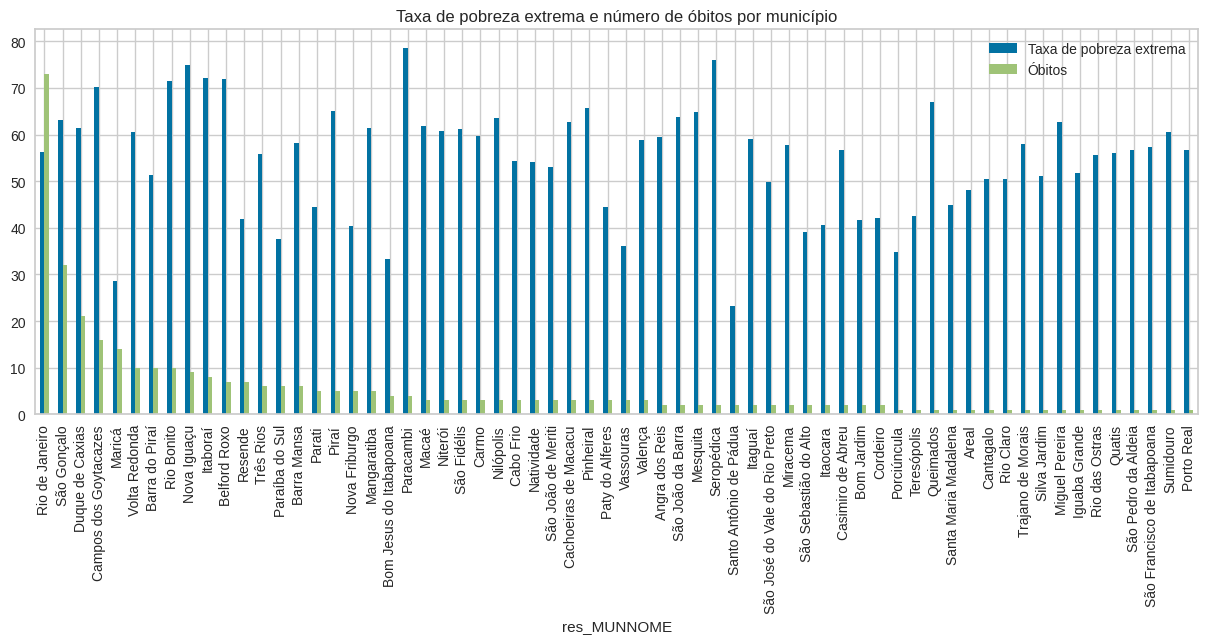

In [298]:
mun_pobreza_obitos = pd.DataFrame(pd_sihsus_rj_polis_limpo6[["tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021", "res_MUNNOME"]].value_counts()).reset_index().rename(columns={0: 'Óbitos', 'tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021': 'Taxa de pobreza extrema'})
mun_pobreza_obitos = mun_pobreza_obitos.set_index("res_MUNNOME")
mun_pobreza_obitos.plot(kind="bar", figsize= (15, 5), title= 'Taxa de pobreza extrema e número de óbitos por município')

In [ ]:
mun_pobreza_obitos = pd.DataFrame(pd_sihsus_rj_polis_limpo6[["tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021", "res_MUNNOME"]].value_counts()).reset_index().rename(columns={0: 'Óbitos', 'tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021': 'Taxa de pobreza extrema'})
mun_pobreza_obitos = mun_pobreza_obitos.set_index("res_MUNNOME")
mun_pobreza_obitos.plot(kind="bar", figsize= (15, 5), title= 'Taxa de pobreza extrema e número de óbitos por município')

In [213]:
#Instalando a biblioteca geopandas para avaliar a distribuição dos casos de febres virais no mapa do RJ.
!pip install geopandas

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
#Importando a biblioteca geopandas.
import geopandas as gpd

In [313]:
#Chamando o arquivo com os polígonos de coordenadas dos municípios do estado do RJ.
rj_estado = gpd.read_file('https://github.com/RaquelSMartins/Trabalho_Final_PCDAS/raw/main/RJ_Map/RJ_Map.shp')
rj_estado.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


In [217]:
#Definindo a função que calcula as porcentagens de ocorrência dos óbitos nos municípios do RJ.
def get_percentage(row):
  return ((100 * row)/345)

df_mapa = pd.DataFrame(pd_sihsus_rj_polis_limpo6["res_MUNNOME"].value_counts()).reset_index().rename(columns= {'index': 'NM_MUNICIP', 'res_MUNNOME': 'Óbitos'})

df_mapa['Óbitos'] = df_mapa['Óbitos'].map(get_percentage)
df_mapa['NM_MUNICIP'] = df_mapa['NM_MUNICIP'].str.upper()
df_mapa

,NM_MUNICIP,Óbitos
0,RIO DE JANEIRO,21.159420
1,SÃO GONÇALO,9.275362
2,DUQUE DE CAXIAS,6.086957
3,CAMPOS DOS GOYTACAZES,4.637681
4,MARICÁ,4.057971
5,VOLTA REDONDA,2.898551
6,RIO BONITO,2.898551
7,BARRA DO PIRAÍ,2.898551
8,NOVA IGUAÇU,2.608696
9,ITABORAÍ,2.318841


In [218]:
rj_estado

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
5,1473,3300258,ARRAIAL DO CABO,"MULTIPOLYGON (((-42.00496 -23.02338, -42.00630..."
6,1474,3300308,BARRA DO PIRAÍ,"POLYGON ((-44.06084 -22.45202, -44.06081 -22.4..."
7,1475,3300407,BARRA MANSA,"POLYGON ((-44.22168 -22.47971, -44.22158 -22.4..."
8,1476,3300456,BELFORD ROXO,"POLYGON ((-43.37030 -22.69426, -43.37009 -22.6..."
9,1477,3300506,BOM JARDIM,"POLYGON ((-42.37995 -22.12575, -42.37850 -22.1..."


In [219]:
lista1 = df_mapa['NM_MUNICIP'].unique()

lista2 = rj_estado['NM_MUNICIP'].unique()

In [220]:
#Inserindo os municípios de nulos para que eles apareçam no mapa, mesmo sem ocorência.
nulos = pd.DataFrame({'NM_MUNICIP': np.setdiff1d(lista2, lista1), 'Óbitos': None})

df_mapa = df_mapa.append(nulos)

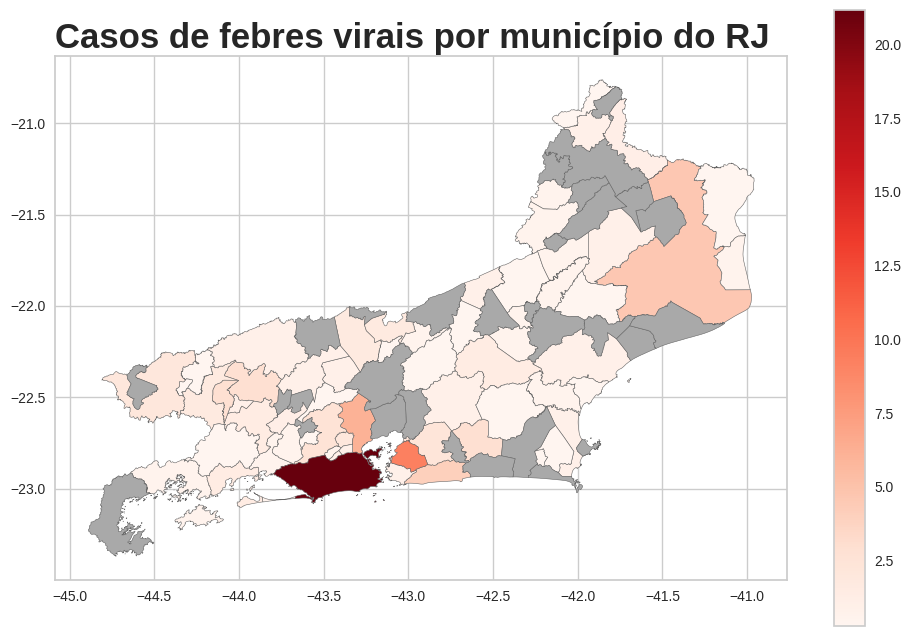

In [314]:
#Construção do mapa.
def plot_map(title, map, data, color):
  fig, ax = plt.subplots(1, figsize=(15,8))

  mapa = map.merge(data, on='NM_MUNICIP')
  mapa.plot(column='Óbitos', cmap=color, linewidth=0.4, ax=ax, edgecolor='.4', missing_kwds=dict(color='darkgrey',))

  plt.title(title, fontsize=25, fontweight=700, loc='left')

  bar_info = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=data['Óbitos'].min(), vmax=data['Óbitos'].max()))
  bar_info._A= []
  cbar = fig.colorbar(bar_info, fraction=0.33, pad=0.04)

plot_map('Casos de febres virais por município do RJ', rj_estado, df_mapa, "Reds")

Observando-se o gráfico "Casos de mortes por febres virais", verifica-se que a maior parte das mortes encontram-se na cidade do Rio de Janeiro, logo após encontra-se São Gonçalo, Duque de Caxias, Campos dos Goytacazes, Maricá, Volta Redonda, Barra do Piraí, Rio Bonito, Nova Iguaçú, Itaboraí e etc. O mapa "Casos de febres virais por município do RJ" mostra essa informação e ainda os municípios em ciza onde não foram registrados casos de morte.
Os seis municípios que possuem as maiores taxas de pessoas em situação de pobreza extrema são (em ordem decrescente): Piracambi, Mesquita, Nova Iguaçú, Itaboraí, Bolford Roxo e Barra do Piraí.
Uma informação relevante é a de que, segundo o Censo Demográfico de 2022 do IBGE, as 10 cidades do Rio de Janeiro mais populosas são (em ordem decrescente): Rio de Janeiro, São Gonçalo, Duque de Caxias, Nova Iguaçu, Campos dos Goytacazes, Belford Roxo, Niterói, São João de Meriti, Petrópolis e Volta Redonda (https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Rio_de_Janeiro_por_popula%C3%A7%C3%A3o).
A lógica de que a maior parte das mortes ocorrem em virtude da maior concentração de pessoas em determinados municípios pode ser válida para os três municípios mais populosos (Rio de Janeiro, São Gonçalo, Duque de Caxias), porém observando-se o gráfico que mostra a taxa de pobreza extrema juntamente com os óbitos, há uma suspeita de que esse fator sócioeconômico possa ter contribuição no número de óbitos, algo a ser confirmado.

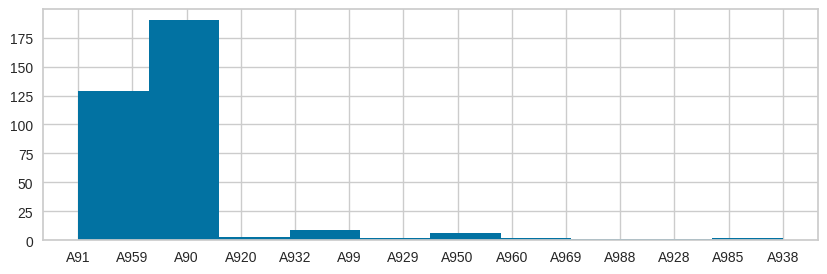

In [222]:
pd_sihsus_rj_polis_limpo6.DIAG_PRINC.hist(bins=10, figsize=(10,3))
plt.show()

Dengue é o "diagnóstico principal" de maior ocorrência na coorte de indivíduos internados que vieram a óbito por febres virais, seguido de febre amarela e dengue hemorrágica.

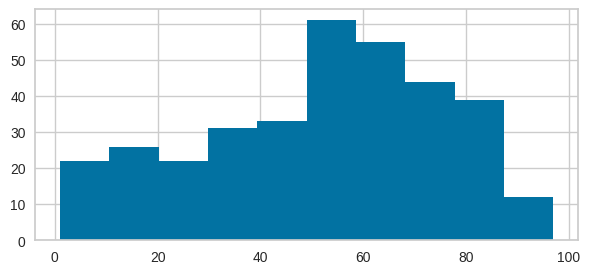

In [223]:
pd_sihsus_rj_polis_limpo6.IDADE.hist(bins=10, figsize=(7,3))
plt.show()

A coorte de pacientes tem de crianças a idosos, sendo que a maior parte dos óbitos ocorre entre 50 e 80 anos.

In [224]:
pd_sihsus_rj_polis_limpo6.IDADE.mean()

51.96811594202899

A média de idade dos casos de óbito é de  aproximadamente 52.

In [225]:
pd_sihsus_rj_polis_limpo6.IDADE.mode()

0    63.0
Name: IDADE, dtype: float64

63 é a moda da idade de casos de óbito.

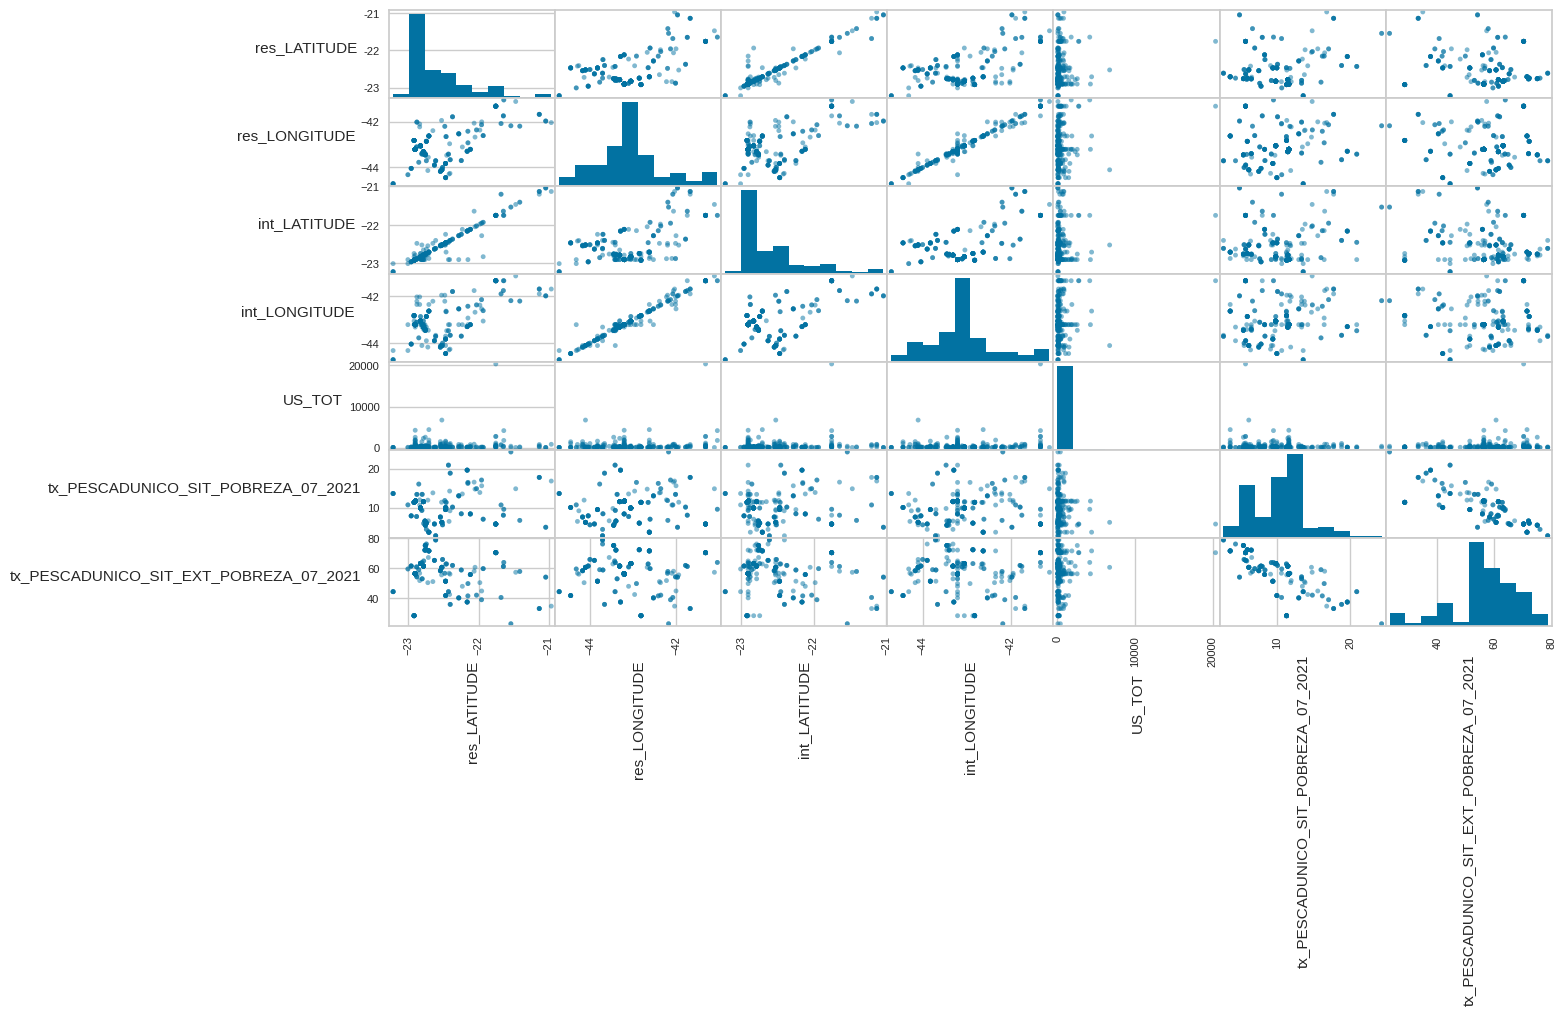

In [226]:
from pandas.plotting import scatter_matrix
attributes = ["res_LATITUDE", "res_LONGITUDE","int_LATITUDE", "int_LONGITUDE", "US_TOT", "tx_PESCADUNICO_SIT_POBREZA_07_2021", "tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021"]

axes = scatter_matrix(pd_sihsus_rj_polis_limpo6[attributes], figsize=(15, 8))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')


Observando o conjunto de gráficos acima, verifica-se que a localização da residência possui uma alta correlação com a localização da internação, ou seja, o paciente procura internação próximo de onde reside.

###Transformação e discretização

In [227]:
#Transformando a variável "ano_internacao" em número inteiro.
pd_sihsus_rj_polis_limpo6["ano_internacao"] = pd_sihsus_rj_polis_limpo6["ano_internacao"].astype("int")

In [228]:
pd_sihsus_rj_polis_limpo6.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_subcat,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_raca_cor,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,TRATAMENTO DE DENGUE HEMORRÁGICA,TRATAMENTO DE DENGUE HEMORRÁGICA,A91 Febre hemorragica dev virus do dengue,Baía da Ilha Grande,-23.007000,-44.318001,6.0,800.429993,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,1 dia,None,Municipal planea assist,Masculino,Urgência,Não,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,A95.9 Febre amarela NE,Baía da Ilha Grande,-22.903000,-43.208000,2.0,1182.296021,-23.007000,-44.318001,6.0,800.429993,Angra dos Reis,2 dias,Branca,Municipal planea assist,Feminino,Urgência,Não,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,A90 Dengue,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,1 dia,Preta,Municipal planea assist,Masculino,Urgência,Sim,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HE...,A92.0 Febre de Chikungunya,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,0 dias,Branca,Municipal planea assist,Masculino,Urgência,Não,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,TRATAMENTO DE DENGUE CLÁSSICA,TRATAMENTO DE DENGUE CLÁSSICA,A90 Dengue,Médio Paraíba,-22.469999,-43.826000,363.0,578.471008,-22.469999,-43.826000,363.0,578.471008,Barra do Piraí,3 dias,Amarela,Municipal planea assist,Masculino,Urgência,Não,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [229]:
pd_sihsus_rj_polis_limpo6["def_procedimento_realizado"].unique()

array(['TRATAMENTO DE DENGUE HEMORRÁGICA',
       'TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HEMORRÁGICAS VIRAIS',
       'TRATAMENTO DE DENGUE CLÁSSICA',
       'DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA',
       'TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA',
       'TRATAMENTO DE INSUFICIENCIA RENAL AGUDA',
       'TRATAMENTO DE OUTRAS DOENÇAS BACTERIANAS',
       'TRATAMENTO DE OUTRAS DOENCAS DO APARELHO RESPIRATORIO',
       'TRATAMENTO DE HANTAVIROSE',
       'DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA PEDIATRICA'],
      dtype=object)

In [230]:
pd_sihsus_rj_polis_limpo6["def_procedimento_solicitado"].unique()

array(['TRATAMENTO DE DENGUE HEMORRÁGICA',
       'TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HEMORRÁGICAS VIRAIS',
       'TRATAMENTO DE DENGUE CLÁSSICA',
       'DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA',
       'TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA',
       'TRATAMENTO DE OUTRAS DOENÇAS BACTERIANAS',
       'TRATAMENTO DE OUTRAS DOENCAS DO APARELHO RESPIRATORIO',
       'TRATAMENTO DE ACIDENTE VASCULAR CEREBRAL - AVC (ISQUEMICO OU HEMORRAGICO AGUDO)',
       'TRATAMENTO DE HANTAVIROSE', 'TRATAMENTO DA PIELONEFRITE',
       'TRATAMENTO DE DISTURBIOS METABOLICOS',
       'DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA PEDIATRICA',
       'TRATAMENTO DE DIABETES MELLITUS'], dtype=object)

In [231]:
dicio1 = {
    'TRATAMENTO DE DENGUE HEMORRÁGICA': 0,
    'TRATAMENTO DE FEBRES POR ARBOVÍRUS E FEBRES HEMORRÁGICAS VIRAIS': 1,
    'TRATAMENTO DE DENGUE CLÁSSICA' : 2,
    'DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA': 3,
    'TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA': 4,
    'TRATAMENTO DE OUTRAS DOENÇAS BACTERIANAS': 5,
    'TRATAMENTO DE OUTRAS DOENCAS DO APARELHO RESPIRATORIO': 6,
    'TRATAMENTO DE ACIDENTE VASCULAR CEREBRAL - AVC (ISQUEMICO OU HEMORRAGICO AGUDO)': 7,
    'TRATAMENTO DE HANTAVIROSE': 8,
    'TRATAMENTO DA PIELONEFRITE': 9,
    'TRATAMENTO DE DISTURBIOS METABOLICOS': 10,
    'DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA PEDIATRICA': 11,
    'TRATAMENTO DE DIABETES MELLITUS': 12,
    'TRATAMENTO DE INSUFICIENCIA RENAL AGUDA': 13
    }

def renamer(key):
  return dicio1[key]

pd_sihsus_rj_polis_limpo6["def_procedimento_realizado"] = pd_sihsus_rj_polis_limpo6["def_procedimento_realizado"].map(renamer)
pd_sihsus_rj_polis_limpo6["def_procedimento_solicitado"] = pd_sihsus_rj_polis_limpo6["def_procedimento_solicitado"].map(renamer)

In [232]:
#Investigando a correlação entre as colunas "def_procedimento_realizado" e "def_procedimento_solicitado" para avaliar a necessidade de usar as duas.

pd_sihsus_rj_polis_limpo6["def_procedimento_realizado"].corr(pd_sihsus_rj_polis_limpo6["def_procedimento_solicitado"])

0.676510985046195

**Sendo a correlação entre elas não tão alta, achamos mais prudente não tirar a segunda  e deixar a decisão para a etapa de seleção de variáveis**

In [233]:
pd_sihsus_rj_polis_limpo6.tail()


,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_diag_princ_subcat,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_raca_cor,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
379,A90,2013,2,2,A90 Dengue,Médio Paraíba,-22.246000,-43.700001,560.0,1304.769043,-22.246000,-43.700001,560.0,1304.769043,Valença,6 dias,Branca,Municipal planea assist,Masculino,Urgência,Não,48.0,135.089996,0.0,7.0,2013.0,330610.0,330610.0,330610,8.384996,58.793063,8.498784,2137,14984,2166,25486,33675.61
380,A91,2018,0,0,A91 Febre hemorragica dev virus do dengue,Médio Paraíba,-22.246000,-43.700001,560.0,1304.769043,-22.246000,-43.700001,560.0,1304.769043,Valença,2 dias,Branca,Municipal planea assist,Masculino,Urgência,Sim,57.0,726.020020,0.0,0.0,2018.0,330610.0,330610.0,330610,8.384996,58.793063,8.498784,2137,14984,2166,25486,33675.61
381,A90,2013,2,2,A90 Dengue,Centro-Sul,-22.403999,-43.662998,434.0,552.437988,-22.403999,-43.662998,434.0,552.437988,Vassouras,6 dias,None,Municipal planea assist,Masculino,Urgência,Não,97.0,135.089996,0.0,7.0,2013.0,330620.0,330620.0,330620,18.836518,36.084926,8.526539,2218,4249,1004,11775,26624.86
382,A950,2018,1,1,A95.0 Febre amarela silvestre,Centro-Sul,-22.403999,-43.662998,434.0,552.437988,-22.403999,-43.662998,434.0,552.437988,Vassouras,7 dias,None,Municipal planea assist,Masculino,Urgência,Sim,39.0,1050.579956,0.0,2.0,2018.0,330620.0,330620.0,330620,18.836518,36.084926,8.526539,2218,4249,1004,11775,26624.86
383,A959,2018,1,1,A95.9 Febre amarela NE,Centro-Sul,-22.403999,-43.662998,434.0,552.437988,-22.403999,-43.662998,434.0,552.437988,Vassouras,5 dias,None,Municipal planea assist,Masculino,Urgência,Sim,63.0,686.940002,1.0,1.0,2018.0,330620.0,330620.0,330620,18.836518,36.084926,8.526539,2218,4249,1004,11775,26624.86


**Investigando as colunas DIAG_PRINC e def_diag_princ_subcat para ver se ambas possuem a mesma informação.**



In [234]:
pd_sihsus_rj_polis_limpo6["DIAG_PRINC"].value_counts()

A90     190
A91     119
A959     10
A99       7
A950      6
A920      3
A932      2
A929      2
A960      1
A969      1
A988      1
A928      1
A985      1
A938      1
Name: DIAG_PRINC, dtype: int64

In [235]:
pd_sihsus_rj_polis_limpo6["def_diag_princ_subcat"].value_counts()

A90   Dengue                                          190
A91   Febre hemorragica dev virus do dengue           119
A95.9 Febre amarela NE                                 10
A99   Febres hemorragicas virais NE                     7
A95.0 Febre amarela silvestre                           6
A92.0 Febre de Chikungunya                              3
A93.2 Febre do Colorado transm p/carrapatos             2
A92.9 Febre viral transm p/mosquitos NE                 2
A96.0 Febre hemorragica de Junin                        1
A96.9 Febre hemorragica p/arenavirus NE                 1
A98.8 Outr febres hemorragicas espec p/virus            1
A92.8 Outr febres virais espec transm p/mosquitos       1
A98.5 Febre hemorragica c/sindr renal                   1
A93.8 Outr febres virais espec transm p/artropodes      1
Name: def_diag_princ_subcat, dtype: int64

In [236]:
#Dado que ambas as colunas possuem a mesma informação, irei descartar a coluna DIAG_PRINC.

pd_sihsus_rj_polis_limpo7 = pd_sihsus_rj_polis_limpo6.drop(["def_diag_princ_subcat"], axis = 1)

In [237]:
pd_sihsus_rj_polis_limpo7["int_ALTITUDE"] = pd_sihsus_rj_polis_limpo7["int_ALTITUDE"].astype(int)
pd_sihsus_rj_polis_limpo7["res_ALTITUDE"] = pd_sihsus_rj_polis_limpo7["res_ALTITUDE"].astype(int)

In [238]:
pd_sihsus_rj_polis_limpo7.head(5)

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_raca_cor,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1 dia,None,Municipal planea assist,Masculino,Urgência,Não,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,2 dias,Branca,Municipal planea assist,Feminino,Urgência,Não,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1 dia,Preta,Municipal planea assist,Masculino,Urgência,Sim,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,0 dias,Branca,Municipal planea assist,Masculino,Urgência,Não,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,3 dias,Amarela,Municipal planea assist,Masculino,Urgência,Não,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [239]:
#Acertando a coluna def_dias_perm, pois os valores estão da seguinte forma: "1 dia", iremos trocar para número inteiro e não string.

pd_sihsus_rj_polis_limpo7["def_dias_perm"].value_counts()

1 dia              102
2 dias              49
8 a 14 dias         44
3 dias              30
0 dias              29
15 a 21 dias        18
6 dias              17
4 dias              16
5 dias              16
7 dias              13
22 a 28 dias         6
29 dias ou mais      5
Name: def_dias_perm, dtype: int64

In [240]:
lista = ["0 dias", "1 dia", "2 dias", "3 dias", "4 dias", "5 dias","6 dias", "7 dias"]
indices = pd_sihsus_rj_polis_limpo7[pd_sihsus_rj_polis_limpo7["def_dias_perm"].isin(lista)].index
pd_sihsus_rj_polis_limpo7.loc[indices, "def_dias_perm"] = "0 a 7 dias"
pd_sihsus_rj_polis_limpo7.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_raca_cor,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,0 a 7 dias,None,Municipal planea assist,Masculino,Urgência,Não,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,0 a 7 dias,Branca,Municipal planea assist,Feminino,Urgência,Não,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,0 a 7 dias,Preta,Municipal planea assist,Masculino,Urgência,Sim,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,0 a 7 dias,Branca,Municipal planea assist,Masculino,Urgência,Não,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,0 a 7 dias,Amarela,Municipal planea assist,Masculino,Urgência,Não,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [241]:
pd_sihsus_rj_polis_limpo7["def_dias_perm"].value_counts()

0 a 7 dias         272
8 a 14 dias         44
15 a 21 dias        18
22 a 28 dias         6
29 dias ou mais      5
Name: def_dias_perm, dtype: int64

In [242]:
#Aqui estou mapeando a coluna de dias de internação para inteiro mostrando as semanas de internação.
dicio2 = {
    "0 a 7 dias": 1,
    "8 a 14 dias": 2,
    "15 a 21 dias": 3,
    "22 a 28 dias": 4,
    "29 dias ou mais": 5
    }

def renamer2(key):
  return dicio2[key]

pd_sihsus_rj_polis_limpo7["def_dias_perm"] = pd_sihsus_rj_polis_limpo7["def_dias_perm"].map(renamer2)

pd_sihsus_rj_polis_limpo7.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_dias_perm,def_raca_cor,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,None,Municipal planea assist,Masculino,Urgência,Não,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,Branca,Municipal planea assist,Feminino,Urgência,Não,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Preta,Municipal planea assist,Masculino,Urgência,Sim,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Branca,Municipal planea assist,Masculino,Urgência,Não,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Amarela,Municipal planea assist,Masculino,Urgência,Não,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [243]:
pd_sihsus_rj_polis_limpo7 = pd_sihsus_rj_polis_limpo7.rename(columns={"def_dias_perm" : "def_semanas_perm"})
pd_sihsus_rj_polis_limpo7.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_raca_cor,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,None,Municipal planea assist,Masculino,Urgência,Não,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,Branca,Municipal planea assist,Feminino,Urgência,Não,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Preta,Municipal planea assist,Masculino,Urgência,Sim,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Branca,Municipal planea assist,Masculino,Urgência,Não,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Amarela,Municipal planea assist,Masculino,Urgência,Não,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [244]:
#Tratando os valores faltantes da variável def_raca_cor.

pd_sihsus_rj_polis_limpo7["def_raca_cor"].value_counts()

#Devido ao fato de muitos valores estarem não preenchidos, essa coluna será descartada.
pd_sihsus_rj_polis_limpo8 = pd_sihsus_rj_polis_limpo7.drop(["def_raca_cor"], axis=1)

pd_sihsus_rj_polis_limpo8.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,Municipal planea assist,Masculino,Urgência,Não,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,Municipal planea assist,Feminino,Urgência,Não,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Municipal planea assist,Masculino,Urgência,Sim,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Municipal planea assist,Masculino,Urgência,Não,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,Municipal planea assist,Masculino,Urgência,Não,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [245]:
#Binarizando as variáveis de apenas dois valores.

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
pd_sihsus_rj_polis_limpo8["def_gestao"] = lb.fit_transform(pd_sihsus_rj_polis_limpo8["def_gestao"])
pd_sihsus_rj_polis_limpo8["def_sexo"] = lb.fit_transform(pd_sihsus_rj_polis_limpo8["def_sexo"])
pd_sihsus_rj_polis_limpo8["def_diarias_uti"] = lb.fit_transform(pd_sihsus_rj_polis_limpo8["def_diarias_uti"])
pd_sihsus_rj_polis_limpo8["def_car_int"] = lb.fit_transform(pd_sihsus_rj_polis_limpo8["def_car_int"])

In [246]:
pd_sihsus_rj_polis_limpo8.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,1,1,0,57.0,129.669998,0.0,2.0,2014.0,330010.0,330010.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,0,1,0,67.0,45.310001,0.0,3.0,2018.0,330455.0,330455.0,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,1,1,1,1,53.0,461.790009,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,1,1,1,0,14.0,105.089996,0.0,1.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,1,1,1,0,47.0,177.619995,0.0,4.0,2011.0,330030.0,330030.0,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [247]:
#Transformando a variável IDADE em número inteiro.

pd_sihsus_rj_polis_limpo8["IDADE"] = pd_sihsus_rj_polis_limpo8["IDADE"].astype(int)
pd_sihsus_rj_polis_limpo8["DIAR_ACOM"] = pd_sihsus_rj_polis_limpo8["DIAR_ACOM"].astype(int)
pd_sihsus_rj_polis_limpo8["QT_DIARIAS"] = pd_sihsus_rj_polis_limpo8["QT_DIARIAS"].astype(int)
pd_sihsus_rj_polis_limpo8["ANO_CMPT"] = pd_sihsus_rj_polis_limpo8["ANO_CMPT"].astype(int)
pd_sihsus_rj_polis_limpo8["MUNIC_MOV"] = pd_sihsus_rj_polis_limpo8["MUNIC_MOV"].astype(int)
pd_sihsus_rj_polis_limpo8["UF_ZI"] = pd_sihsus_rj_polis_limpo8["UF_ZI"].astype(int)

pd_sihsus_rj_polis_limpo8.head()

,DIAG_PRINC,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,def_rsaud_res,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,MUNIC_MOV,UF_ZI,MUNIC_RES,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018
0,A91,2014,0,0,Baía da Ilha Grande,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,1,1,0,57,129.669998,0,2,2014,330010,330010,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
1,A959,2018,1,1,Baía da Ilha Grande,-22.903000,-43.208000,2,1182.296021,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,0,1,0,67,45.310001,0,3,2018,330455,330455,330010,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88
7,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,1,1,1,1,53,461.790009,0,1,2011,330030,330030,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
8,A920,2011,1,1,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,1,1,1,0,14,105.089996,0,1,2011,330030,330030,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24
9,A90,2011,2,2,Médio Paraíba,-22.469999,-43.826000,363,578.471008,-22.469999,-43.826000,363,578.471008,Barra do Piraí,1,1,1,1,0,47,177.619995,0,4,2011,330030,330030,330030,9.461577,51.378107,12.046863,2657,14428,3383,28082,20602.24


In [248]:
df_final = pd.get_dummies(pd_sihsus_rj_polis_limpo8, columns=['def_rsaud_res','DIAG_PRINC','MUNIC_MOV','UF_ZI', 'MUNIC_RES'], drop_first=True)
df_final.head()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630
0,2014,0,0,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,1,1,0,57,129.669998,0,2,2014,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [249]:
df_final = df_final.reset_index().drop(columns=['index'])

In [250]:
df_final_com_municipios = df_final
df_final = df_final.drop(["res_MUNNOME"], axis=1)
df_final.head()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630
0,2014,0,0,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,1,1,1,1,0,57,129.669998,0,2,2014,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [251]:
df_final_com_municipios.head()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630
0,2014,0,0,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,1,1,0,57,129.669998,0,2,2014,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Etapa de normalização das variáveis.

In [252]:
df_final.describe()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630
count,345.000000,345.00000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345

In [253]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_final_minmax = scaler.fit_transform(df_final)
df_final[df_final.columns] = scaler.fit_transform(df_final[df_final.columns])
df_final.head()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630
0,0.363636,0.000000,0.000000,0.096967,0.109905,0.004739,0.194698,0.093570,0.107865,0.006889,0.194698,0.0,1.0,1.0,1.0,0.0,0.583333,0.005725,0.0,0.027778,0.363636,0.368384,0.653698,0.507887,0.041055,0.047851,0.043465,0.044739,0.170069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [254]:
df_final.describe()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.

In [255]:
df_final.shape

(345, 213)

###Redução de Dimensionalidade

In [256]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [257]:
pca = PCA(n_components=213, random_state=14)
principalComponents = pca.fit_transform(df_final)
pca

PCA(n_components=213, random_state=14)

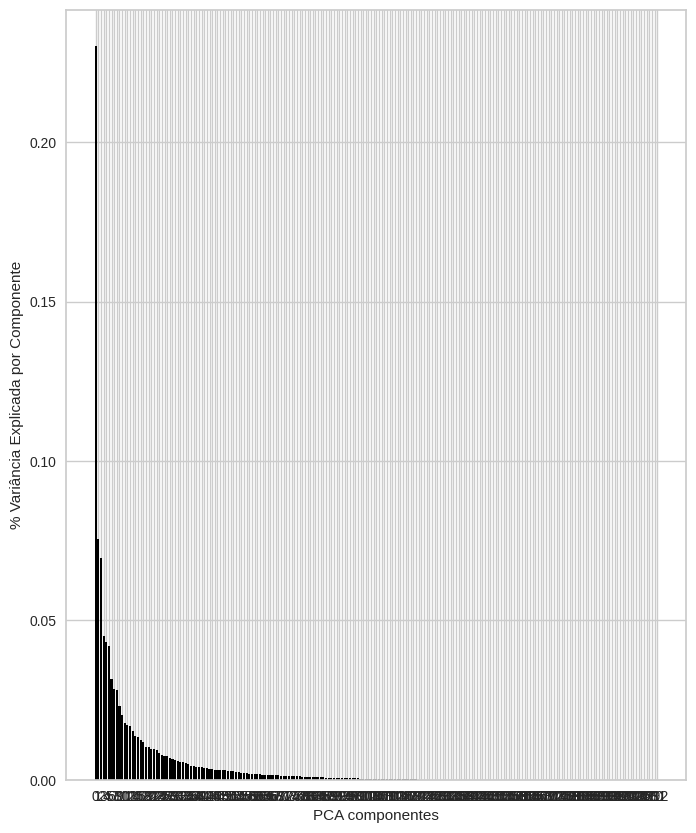

In [258]:
# Criando intervalo para capturar a variância explicada por cada componente
variaveis = range(pca.n_components_)
plt.bar(variaveis, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA componentes')
plt.ylabel('% Variância Explicada por Componente')
plt.xticks(variaveis)

# Salvar componentes para novo DataFrame
df_final_PCA_componentes = pd.DataFrame(principalComponents)
# print(df_final_PCA_componentes)

In [259]:
# Como encontrar o número de componentes principais de acordo com a % de variância explicada desejada
pca = PCA(n_components = 0.95)
pca.fit(df_final_minmax)
df_final_PCA = pd.DataFrame(pca.transform(df_final_PCA_componentes))
df_final_PCA.shape

(345, 58)

###Clustering - KMeans: método baseado em um conjunto de objetos para os quais as saídas desejadas não são conhecidas ou a tarefa é de categorização



In [260]:
!pip install pycaret

In [261]:
from pycaret.clustering import *

In [262]:
df_final_CLUSTER = setup(df_final_PCA, normalize = False, session_id = 14)

,Description,Value
0,Session id,14
1,Original data shape,"(345, 58)"
2,Transformed data shape,"(345, 58)"
3,Numeric features,58
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [263]:
final_CLUSTER_modelo = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2089,70.6214,2.1590,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [264]:
kmeans_final_CLUSTER = assign_model(final_CLUSTER_modelo)
kmeans_final_CLUSTER

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,Cluster
0,-0.544958,-0.258534,0.373300,-0.055966,0.523350,0.358120,-0.535472,0.549883,-0.119916,-0.604432,0.165395,-0.192659,0.200424,0.392159,-0.227035,-0.241788,0.183319,0.727767,-0.196635,-0.027946,0.291792,0.464334,-0.427153,0.128856,0.313520,0.187202,0.263931,0.006854,0.121368,0.240730,-0.352830,-0.021380,0.161066,-0.104183,0.083537,-0.135296,0.130404,-0.105278,-0.072831,0.121891,0.172364,0.279827,0.086721,-0.079211,-0.078016,0.000513,0.101741,-0.066579,-0.383104,0.062470,-0.193337,-0.275420,-0.071177,-0.012979,-0.189789,-0.282929,-0.198018,0.044692,Cluster 1
1,-0.577264,-0.772127,0.392972,-0.015261,0.166045,0.710133,-0.528696,0.687444,-0.592419,-0.121016,-0.289125,0.033150,-0.201998,0.463400,-0.836028,-0.344138,0.112408,0.670967,-0.326154,0.081081,0.331581,0.537985,-0.597606,0.073754,0.194020,0.070070,0.388318,-0.030198,-0.029567,0.495735,-0.375351,0.056003,0.276026,-0.211549,0.246127,-0.157639,0.096892,-0.051172,-0.019375,0.086429,0.029165,-0.045602,-0.140846,-0.055318,0.195626,0.028223,0.114896,0.012786,-0.018979,-0.019772,-0.222607,-0.258181,0.072650,-0.088924,-0.249658,-0.282927,-0.289788,-0.014774,Cluster 1
2,-0.472939,-0.500378,0.443165,0.156399,0.294437,0.402406,-0.477376,0.375089,-0.191479,-0.156716,0.363637,-0.077372,0.261220,0.975276,-0.154700,-0.121558,0.361023,0.821123,0.042026,-0.197649,0.605266,0.988994,-0.589267,0.002665,0.131666,0.198029,0.390473,-0.319275,0.291746,-0.121350,-0.156580,-0.131573,-0.049426,-0.352664,-0.059153,-0.113248,0.050901,0.077408,0.138518,-0.007046,-0.138839,-0.072379,-0.276474,0.221125,0.083323,-0.044692,-0.175552,-0.098240,0.208382,0.085403,-0.277786,-0.275273,-0.112086,-0.375126,-0.191911,-0.300848,-0.072513,0.015196,Cluster 1
3,-0.313699,-0.708363,0.285485,0.167399,0.322031,0.300680,-0.396790,0.331110,-0.182275,-0.182943,0.370755,0.113991,0.210835,0.975153,0.031594,-0.162649,0.301499,0.733945,0.033560,-0.218057,0.655218,1.146897,-0.502957,0.022843,0.144142,0.294029,0.424269,-0.241840,0.276927,0.035795,-0.267098,-0.231689,0.043159,-0.323595,-0.030371,-0.108684,-0.257092,0.262584,0.143883,0.140969,-0.298386,-0.058735,-0.276848,0.260493,0.172601,-0.128951,-0.149154,-0.052399,0.291158,0.135254,-0.365168,-0.196530,-0.139989,-0.332285,-0.269178,-0.322231,0.075802,0.021586,Cluster 1
4,-0.399460,-0.618793,0.318181,0.275535,0.259180,0.355843,-0.462443,0.278571,-0.163585,-0.111906,0.386212,0.019895,0.233240,1.040405,-0.093353,-0.157794,0.367533,0.789107,0.004614,-0.199656,0.613053,1.064274,-0.503292,0.072501,0.161932,0.241970,0.419196,-0.332814,0.269760,-0.106388,-0.197256,-0.197579,-0.039565,-0.382353,-0.064927,-0.109756,-0.062007,0.054923,0.086813,-0.019237,-0.184386,-0.048929,-0.310747,0.283678,0.088800,-0.101108,-0.250876,-0.105944,0.253543,0.120423,-0.310612,-0.204619,-0.096814,-0.304400,-0.281518,-0.297092,-0.029543,0.071952,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,-0.435733,-0.782126,0.935874,-0.065885,-0.154635,0.315765,-0.160621,0.152013,0.216475,-0.222895,0.867071,-0.135141,0.408923,0.677562,-0.582652,-0.414036,0.417475,0.582113,-0.000844,-0.134113,0.700157,0.772180,-0.257876,-0.243286,0.119435,0.345733,-0.029661,-0.158584,0.404998,-0.039555,-0.415720,-0.138569,0.146573,0.030444,-0.090018,-0.175506,-0.115867,-0.040880,-0.203010,0.096084,-0.018326,-0.054283,-0.114663,0.069149,0.079660,-0.065692,-0.104401,-0.170868,0.096180,0.125729,-0.304195,-0.374098,-0.135343,-0.351336,-0.091878,-0.119483,-0.079621,-0.182566,Cluster 1
341,-0.617100,-0.429806,1.071887,-0.390252,-0.168549,0.529615,-0.149826,0.229302,0.240565,-0.433022,0.747949,-0.408117,0.447408,0.635005,-0.695314,-0.402263,0.397036,0.729828,0.034609,-0.091236

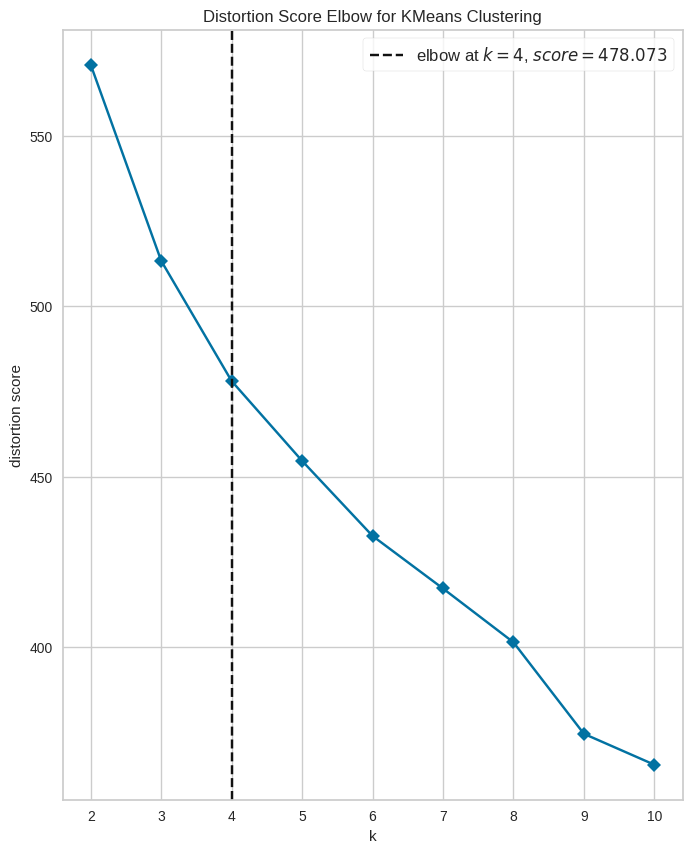

In [265]:
plot_model(final_CLUSTER_modelo, plot = 'elbow')

## Resultados e discussão

Após o uso do algoritmo de clustering, a coorte de pacientes internados que vieram a óbito por febres virais foi separada em 4 grupos, conforme mostra o gráfico abaixo.

In [266]:
plot_model(final_CLUSTER_modelo, plot = 'cluster')

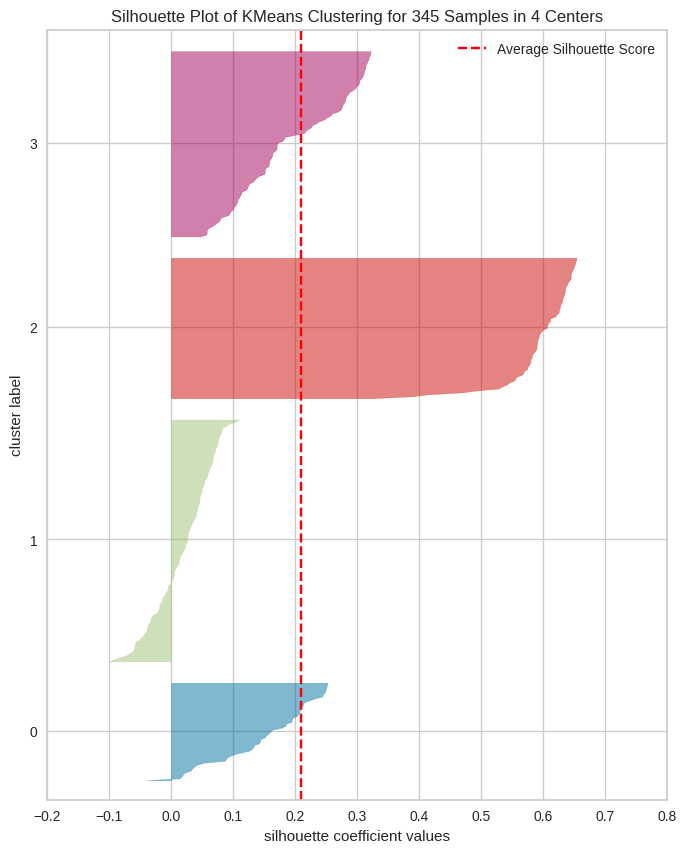

In [267]:
plot_model(final_CLUSTER_modelo, plot = 'silhouette')

In [268]:
plot_model(final_CLUSTER_modelo, plot = 'distribution')

In [269]:
cluster_labels = final_CLUSTER_modelo.labels_

df_final_PCA_cluster_labels = pd.DataFrame(cluster_labels, columns=['Número do Cluster'])
df_final_PCA_cluster_labels = pd.concat ([df_final, df_final_PCA_cluster_labels], axis=1)
df_final_PCA_cluster_labels.shape

(345, 214)

In [270]:
#Nessa célula incluímos o nome dos municípios novamente ao dataframe com os clusters.

df_final_PCA_cluster_labels_com_municipios = pd.DataFrame(cluster_labels, columns=['Número do Cluster'])
df_final_PCA_cluster_labels_com_municipios = pd.concat ([df_final_com_municipios, df_final_PCA_cluster_labels_com_municipios], axis=1)
df_final_PCA_cluster_labels_com_municipios

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,res_MUNNOME,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630,Número do Cluster
0,2014,0,0,-23.007000,-44.318001,6,800.429993,-23.007000,-44.318001,6,800.429993,Angra dos Reis,1,1,1,1,0,57,129.669998,0,2,2014,10.674802,59.467832,8.094167,6788,37815,5147,63589,44590.88,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [271]:
df_final_PCA_cluster_labels.head()

,ano_internacao,def_procedimento_realizado,def_procedimento_solicitado,int_LATITUDE,int_LONGITUDE,int_ALTITUDE,int_AREA,res_LATITUDE,res_LONGITUDE,res_ALTITUDE,res_AREA,def_semanas_perm,def_gestao,def_sexo,def_car_int,def_diarias_uti,IDADE,US_TOT,DIAR_ACOM,QT_DIARIAS,ANO_CMPT,tx_PESCADUNICO_SIT_POBREZA_07_2021,tx_PESCADUNICO_SIT_EXT_POBREZA_07_2021,tx_PESCADUNICO_PCD_07_2021,PESCADUNICO_SIT_POBREZA_07_2021,PESCADUNICO_SIT_EXT_POBREZA_07_2021,PESCADUNICO_PCD_07_2021,PESCADUNICO_TOT_07_2021,PIBPC_2018,def_rsaud_res_Baía da Ilha Grande,def_rsaud_res_Centro-Sul,def_rsaud_res_Metropolitana I,def_rsaud_res_Metropolitana II,def_rsaud_res_Médio Paraíba,def_rsaud_res_Noroeste,def_rsaud_res_Norte,def_rsaud_res_Serrana,DIAG_PRINC_A91,DIAG_PRINC_A920,DIAG_PRINC_A928,DIAG_PRINC_A929,DIAG_PRINC_A932,DIAG_PRINC_A938,DIAG_PRINC_A950,DIAG_PRINC_A959,DIAG_PRINC_A960,DIAG_PRINC_A969,DIAG_PRINC_A985,DIAG_PRINC_A988,DIAG_PRINC_A99,MUNIC_MOV_330020,MUNIC_MOV_330030,MUNIC_MOV_330040,MUNIC_MOV_330045,MUNIC_MOV_330050,MUNIC_MOV_330060,MUNIC_MOV_330070,MUNIC_MOV_330080,MUNIC_MOV_330100,MUNIC_MOV_330110,MUNIC_MOV_330120,MUNIC_MOV_330130,MUNIC_MOV_330150,MUNIC_MOV_330170,MUNIC_MOV_330190,MUNIC_MOV_330200,MUNIC_MOV_330220,MUNIC_MOV_330240,MUNIC_MOV_330250,MUNIC_MOV_330260,MUNIC_MOV_330270,MUNIC_MOV_330290,MUNIC_MOV_330300,MUNIC_MOV_330310,MUNIC_MOV_330320,MUNIC_MOV_330330,MUNIC_MOV_330340,MUNIC_MOV_330350,MUNIC_MOV_330360,MUNIC_MOV_330370,MUNIC_MOV_330380,MUNIC_MOV_330395,MUNIC_MOV_330400,MUNIC_MOV_330411,MUNIC_MOV_330412,MUNIC_MOV_330420,MUNIC_MOV_330430,MUNIC_MOV_330452,MUNIC_MOV_330455,MUNIC_MOV_330470,MUNIC_MOV_330475,MUNIC_MOV_330480,MUNIC_MOV_330490,MUNIC_MOV_330515,MUNIC_MOV_330530,MUNIC_MOV_330570,MUNIC_MOV_330600,MUNIC_MOV_330610,MUNIC_MOV_330620,MUNIC_MOV_330630,UF_ZI_330010,UF_ZI_330030,UF_ZI_330040,UF_ZI_330045,UF_ZI_330050,UF_ZI_330060,UF_ZI_330070,UF_ZI_330080,UF_ZI_330100,UF_ZI_330110,UF_ZI_330120,UF_ZI_330130,UF_ZI_330150,UF_ZI_330170,UF_ZI_330190,UF_ZI_330200,UF_ZI_330220,UF_ZI_330240,UF_ZI_330250,UF_ZI_330260,UF_ZI_330270,UF_ZI_330290,UF_ZI_330300,UF_ZI_330310,UF_ZI_330320,UF_ZI_330330,UF_ZI_330340,UF_ZI_330350,UF_ZI_330360,UF_ZI_330370,UF_ZI_330380,UF_ZI_330395,UF_ZI_330400,UF_ZI_330411,UF_ZI_330412,UF_ZI_330420,UF_ZI_330430,UF_ZI_330452,UF_ZI_330455,UF_ZI_330470,UF_ZI_330475,UF_ZI_330480,UF_ZI_330490,UF_ZI_330515,UF_ZI_330530,UF_ZI_330570,UF_ZI_330600,UF_ZI_330610,UF_ZI_330620,UF_ZI_330630,MUNIC_RES_330022,MUNIC_RES_330030,MUNIC_RES_330040,MUNIC_RES_330045,MUNIC_RES_330050,MUNIC_RES_330060,MUNIC_RES_330070,MUNIC_RES_330080,MUNIC_RES_330100,MUNIC_RES_330110,MUNIC_RES_330120,MUNIC_RES_330130,MUNIC_RES_330150,MUNIC_RES_330170,MUNIC_RES_330187,MUNIC_RES_330190,MUNIC_RES_330200,MUNIC_RES_330210,MUNIC_RES_330240,MUNIC_RES_330260,MUNIC_RES_330270,MUNIC_RES_330285,MUNIC_RES_330290,MUNIC_RES_330300,MUNIC_RES_330310,MUNIC_RES_330320,MUNIC_RES_330330,MUNIC_RES_330340,MUNIC_RES_330350,MUNIC_RES_330360,MUNIC_RES_330370,MUNIC_RES_330380,MUNIC_RES_330385,MUNIC_RES_330395,MUNIC_RES_330400,MUNIC_RES_330410,MUNIC_RES_330411,MUNIC_RES_330412,MUNIC_RES_330414,MUNIC_RES_330420,MUNIC_RES_330430,MUNIC_RES_330440,MUNIC_RES_330452,MUNIC_RES_330455,MUNIC_RES_330460,MUNIC_RES_330470,MUNIC_RES_330475,MUNIC_RES_330480,MUNIC_RES_330490,MUNIC_RES_330500,MUNIC_RES_330510,MUNIC_RES_330515,MUNIC_RES_330520,MUNIC_RES_330530,MUNIC_RES_330555,MUNIC_RES_330560,MUNIC_RES_330570,MUNIC_RES_330580,MUNIC_RES_330590,MUNIC_RES_330600,MUNIC_RES_330610,MUNIC_RES_330620,MUNIC_RES_330630,Número do Cluster
0,0.363636,0.000000,0.000000,0.096967,0.109905,0.004739,0.194698,0.093570,0.107865,0.006889,0.194698,0.0,1.0,1.0,1.0,0.0,0.583333,0.005725,0.0,0.027778,0.363636,0.368384,0.653698,0.507887,0.041055,0.047851,0.043465,0.044739,0.170069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Para entender de que modo os clusters se separaram, foi utilizado um algoritmo de predição dos clusters que fornecesse a contribuição de cada variável para a predição, portanto a separação dos grupos. O algoritmo utilizado foi o XGBoost.

###Treinando o XGBoost para feature importance

In [272]:
# Importando as bibliotecas necessárias para treinamento do modelo XGBoost
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics

In [273]:
# Separação das variáveis de entrada e saída (rótulo)
X = df_final_PCA_cluster_labels.drop(columns=['Número do Cluster'])
y = df_final_PCA_cluster_labels['Número do Cluster']

# Divisão da base em treino e teste com 80-20%, estratificada pelo rótulo
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=14)

# Verificando quantidade dos diferentes rótulos na base de treino
df_y_train.value_counts()

1    100
3     77
2     58
0     41
Name: Número do Cluster, dtype: int64

In [274]:
# Balanceando a base de treino com oversampling, criando dados por interpolação nas classes minoritárias
# Uso do SMOTE
smote_sampler = SMOTE()
df_X_train, df_y_train = smote_sampler.fit_resample(df_X_train, df_y_train)

# Verificando balanceamento dos rótulos da base de treino
df_y_train.value_counts()

3    100
0    100
1    100
2    100
Name: Número do Cluster, dtype: int64

In [275]:
# Treinando o modelo XGBoost com busca de parâmetros em grid e cross-validation de 3 folds
# O número de folds advem da quantidade reduzida de registros na base
model = XGBClassifier()

params = {
    'booster': ['gbtree'],
    'objective': ['multi:softmax'],
    'num_class': [4],
    'eval_metric': ['logloss'],
    'learning_rate': [0.1],
    'n_estimators': [55],
    'max_depth': [3],
    'min_child_weight': [2],
    'gamma': [0],
    'subsample': [0.6],
    'colsample_bytree': [0.4],
    'reg_alpha': [0.00005],
    'seed': [14]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=3,
    verbose=3
)

grid.fit(df_X_train, df_y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END booster=gbtree, colsample_bytree=0.4, eval_metric=logloss, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=55, num_class=4, objective=multi:softmax, reg_alpha=5e-05, seed=14, subsample=0.6;, score=0.955 total time=   9.1s
[CV 2/3] END booster=gbtree, colsample_bytree=0.4, eval_metric=logloss, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=55, num_class=4, objective=multi:softmax, reg_alpha=5e-05, seed=14, subsample=0.6;, score=0.985 total time=   3.2s
[CV 3/3] END booster=gbtree, colsample_bytree=0.4, eval_metric=logloss, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=55, num_class=4, objective=multi:softmax, reg_alpha=5e-05, seed=14, subsample=0.6;, score=0.992 total time=   2.4s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.4],
                         'eval_metric': ['logloss'], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [3],
                         'min_child_weight': [2], 'n_estimators': [55],
                         'num_class': [4], 'objective': ['multi:softmax'],
                         'reg_alpha': [5e-05], 'seed': [14],
                         'subsample': [0.6]},
             scoring='accuracy', verbose=3)

**Sequência de melhores parâmetros encontrados no GridSearch**


1.   {'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'eval_metric': 'logloss',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 55,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 5e-05,
 'seed': 14,
 'subsample': 0.7}

2.   {'booster': 'gbtree',
 'colsample_bytree': 0.6,
 'eval_metric': 'logloss',
 'gamma': 0,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 56,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 5e-05,
 'seed': 14,
 'subsample': 0.7}

3.   {'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'eval_metric': 'logloss',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 55,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 5e-05,
 'seed': 14,
 'subsample': 0.6}

4.   {'booster': 'gbtree',
 'colsample_bytree': 0.4,
 'eval_metric': 'logloss',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 55,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 5e-05,
 'seed': 14,
 'subsample': 0.6}

5.   {'booster': 'gbtree',
 'colsample_bytree': 0.4,
 'eval_metric': 'logloss',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 55,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 5e-05,
 'seed': 14,
 'subsample': 0.6}

In [276]:
# Selecionando o melhor estimador
model = grid.best_estimator_

# Imprimindo os melhores parâmetros encontrados
grid.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.4,
 'eval_metric': 'logloss',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 55,
 'num_class': 4,
 'objective': 'multi:softmax',
 'reg_alpha': 5e-05,
 'seed': 14,
 'subsample': 0.6}

Abaixo estão as métricas do modelo utilizado.

In [277]:
# Imprimindo matriz de confusão multiclasse
df_y_pred = model.predict(df_X_test)
pred_proba = model.predict_proba(df_X_test)[::, 1]

print(metrics.classification_report(df_y_test, df_y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.75000   0.90000   0.81818        10
           1    1.00000   0.88000   0.93617        25
           2    1.00000   1.00000   1.00000        15
           3    0.95000   1.00000   0.97436        19

    accuracy                        0.94203        69
   macro avg    0.92500   0.94500   0.93218        69
weighted avg    0.95000   0.94203   0.94346        69



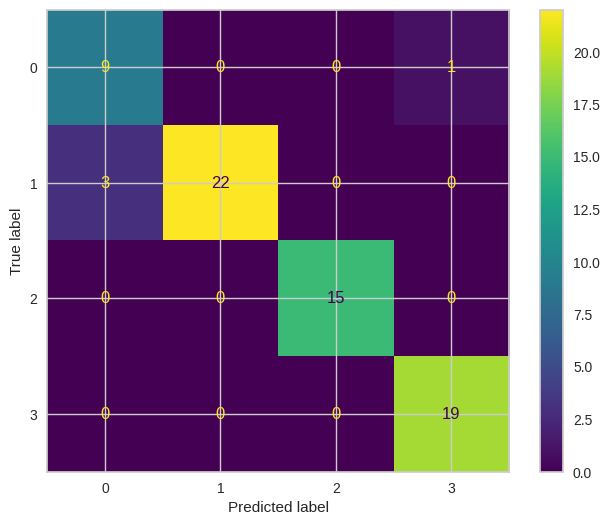

In [278]:
# Criando o gráfico de matriz de confusão multiclasse
cm = confusion_matrix(df_y_test, df_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.rcParams["figure.figsize"] = (8, 6)
disp.plot()
plt.show()

O gráfico abaixo mostra as variáveis que melhor contribuíram para a predição dos grupos, portanto são variáveis que melhor explicam as separações entre os grupos.

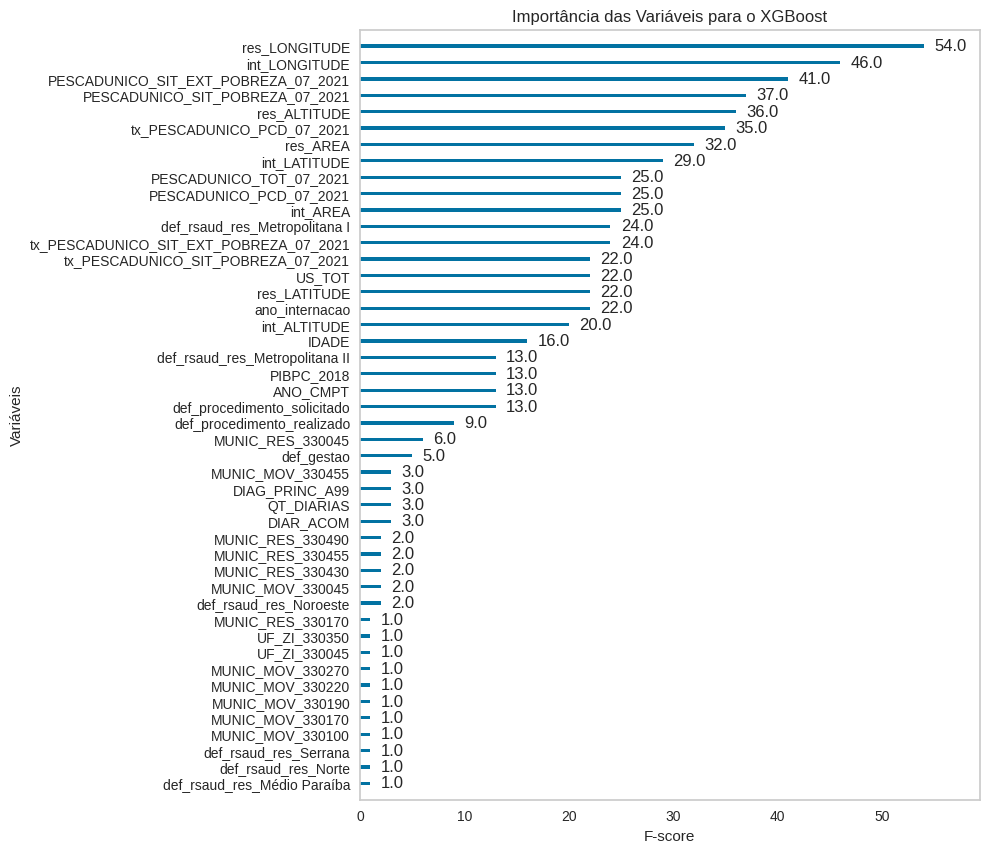

In [279]:
# Imprimindo o gráfico de feature importance do XGBoost
plt.rcParams["figure.figsize"] = (8, 10)
plot_importance(
    model,
    title='Importância das Variáveis para o XGBoost',
    xlabel='F-score',
    ylabel='Variáveis',
    grid=False
)

plt.show()

In [292]:
#Nessa célula o dataframe sofre uma divisão pelo número do cluster.

cluster0 = df_final_PCA_cluster_labels_com_municipios.groupby(df_final_PCA_cluster_labels_com_municipios['Número do Cluster'] == 0).get_group(True)['res_MUNNOME'].value_counts()
cluster1 = df_final_PCA_cluster_labels_com_municipios.groupby(df_final_PCA_cluster_labels_com_municipios['Número do Cluster'] == 1).get_group(True)['res_MUNNOME'].value_counts()
cluster2 = df_final_PCA_cluster_labels_com_municipios.groupby(df_final_PCA_cluster_labels_com_municipios['Número do Cluster'] == 2).get_group(True)['res_MUNNOME'].value_counts()
cluster3 = df_final_PCA_cluster_labels_com_municipios.groupby(df_final_PCA_cluster_labels_com_municipios['Número do Cluster'] == 3).get_group(True)['res_MUNNOME'].value_counts()

In [293]:
#Calculando as porcentagens de cada grupo e a construção dos mapas que mostram a distribuição dos grupos.

def map_percentage (row):
  row['Óbitos'] = (100 * row['Óbitos'])/row['TOTAL']
  return row


def modify_and_plot (title, data, color):
  data = pd.DataFrame(data).reset_index().rename(columns= {'index': 'NM_MUNICIP', 'res_MUNNOME': 'Óbitos'})
  data['TOTAL'] =  data['Óbitos'].sum()
  data = data.apply(map_percentage, axis=1)
  data['NM_MUNICIP'] = data['NM_MUNICIP'].str.upper()
  data = data.drop(columns=['TOTAL'])

  lista1 = data['NM_MUNICIP'].unique()
  lista2 = rj_estado['NM_MUNICIP'].unique()
  nulos = pd.DataFrame({'NM_MUNICIP': np.setdiff1d(lista2, lista1), 'Óbitos': None})
  data = data.append(nulos)

  plot_map(title, rj_estado, data, color)

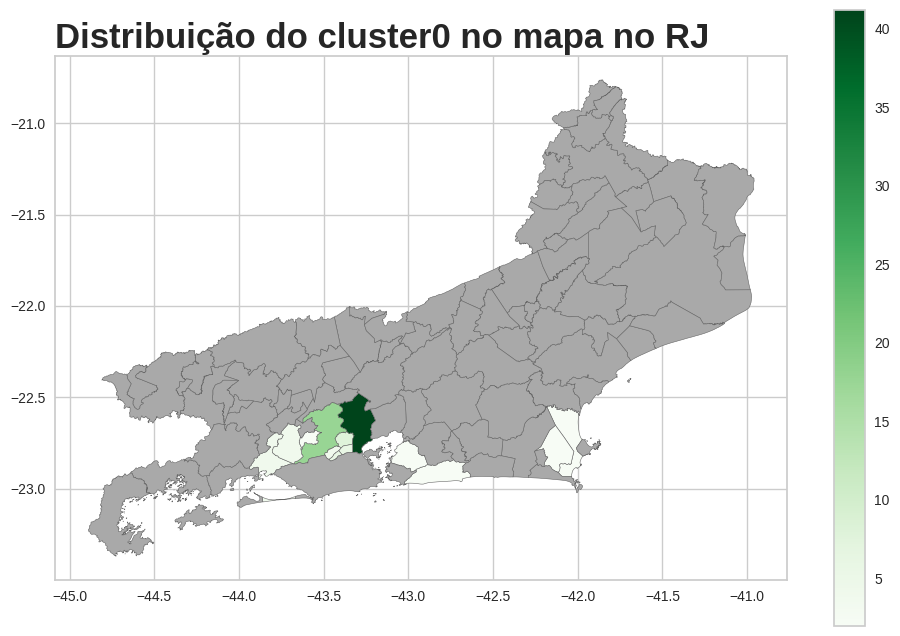

In [294]:
modify_and_plot('Distribuição do cluster0 no mapa no RJ', cluster0, color='Greens')

In [303]:
cluster0

Duque de Caxias        21
Nova Iguaçu             9
Belford Roxo            4
Nilópolis               3
São João de Meriti      3
Itaguaí                 2
Mesquita                2
Seropédica              2
Maricá                  1
Queimados               1
São Gonçalo             1
São Pedro da Aldeia     1
Cabo Frio               1
Name: res_MUNNOME, dtype: int64

O cluster zero é formado principalmente pelos municipios da baixada fluminence e São Gonçalo, além de alguns municípios da Região dos Lagos (Maricá, São Pedro da Aldeia e Cabo Frio).


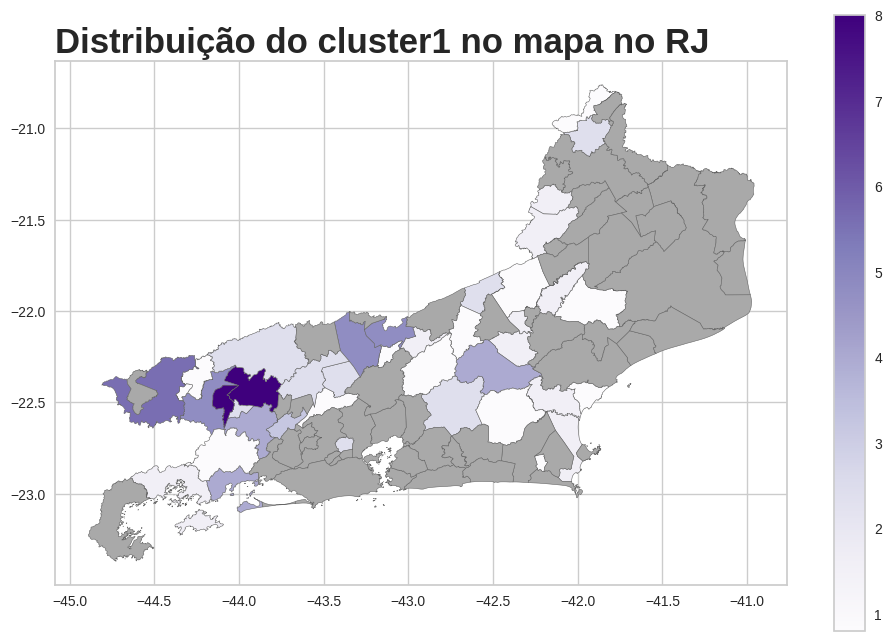

In [295]:
modify_and_plot('Distribuição do cluster1 no mapa no RJ', cluster1, color='Purples')

In [304]:
cluster1

Barra do Piraí                   10
Volta Redonda                    10
Resende                           7
Barra Mansa                       6
Paraíba do Sul                    6
Três Rios                         6
Mangaratiba                       5
Parati                            5
Piraí                             5
Nova Friburgo                     5
Paracambi                         4
Paty do Alferes                   3
Pinheiral                         3
Natividade                        3
Carmo                             3
Valença                           3
Cachoeiras de Macacu              3
Belford Roxo                      3
Vassouras                         3
Cabo Frio                         2
Santo Antônio de Pádua            2
São José do Vale do Rio Preto     2
São Sebastião do Alto             2
Angra dos Reis                    2
Bom Jardim                        2
Casimiro de Abreu                 2
Cordeiro                          2
Miracema                    

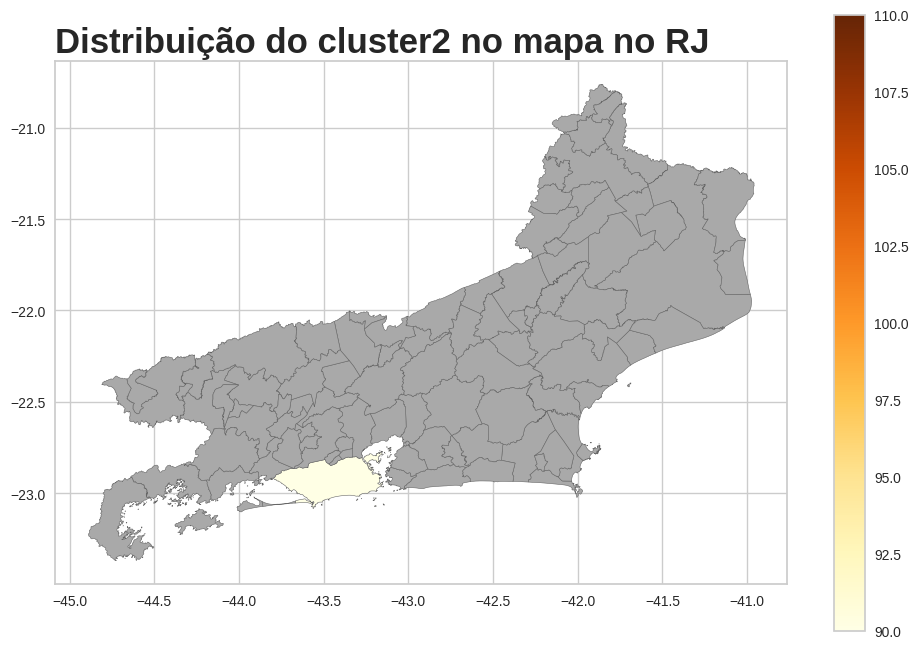

In [296]:
modify_and_plot('Distribuição do cluster2 no mapa no RJ', cluster2, color='YlOrBr')

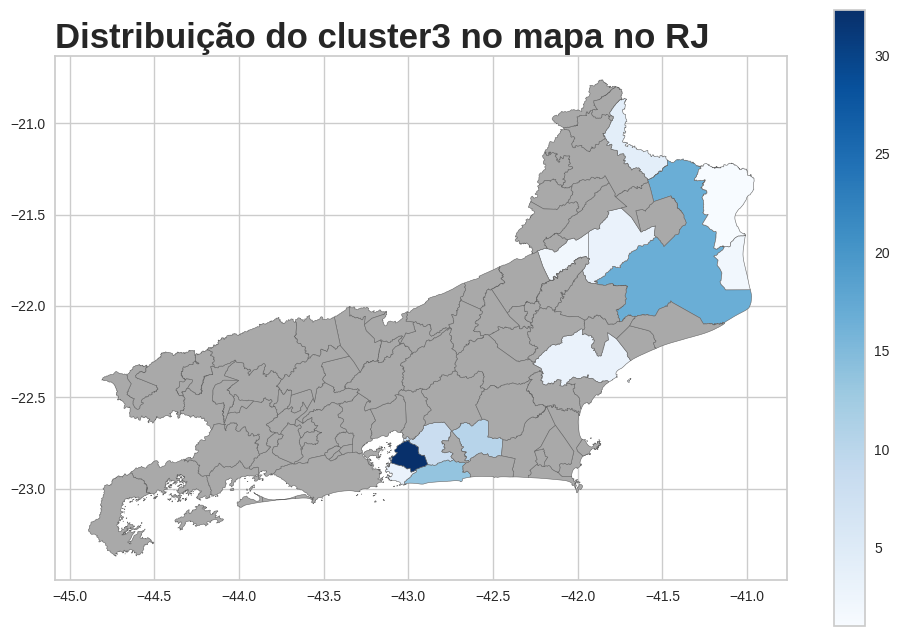

In [297]:
modify_and_plot('Distribuição do cluster3 no mapa no RJ', cluster3, color='Blues')

## **Conclusão**

No presente trabalho um data frame contendo informações sobre pessoas 345 pessoas internadas em hospitais que vieram a óbito em virtude de doenças virais febris foi analisado, demonstrando que, no período entre 2010 a 2021, a dengue, a febre amarela e a dengue hemorrágica foram as principais causas das internações para esse tipo de doença. Na coorte de pacientes, havia desde crianças a idosos, mas a média de idade foi de 51,968 anos, e a moda de 63 anos.

Com o objetivo de identificar o perfil dos casos de internação por febres virais que resultaram em óbitos no Estado do Rio de Janeiro utilizou-se um algoritmo de clustering (K-Means), através do qual obteve-se 4 grupos, cada um contendo 51, 125, 73 e 96 integrantes.

Para entender a contribuição de cada variável na separação dos grupos e com o intuito de trazer interpretabilidade ao modelo, utilizou-se o algoritmo de XGBoost para verificação da contribuição de cada variável.

Identificou-se que as três variáveis que mais contribuíram para a predição dos grupos foram a longitude de residência, a longitude de internação e o número de pessoas em situação de extrema pobreza inscritas no Cadastro Único em Julho de 2021 para o município em que a pessoa veio a óbito.

Desse modo, o estudo sugere que as doenças febris virais possuem um componente geográfico importante e as coordenadas podem identificar regiões em que os óbitos podem se concentrar, o que pode auxiliar na concentração de recursos para a Saúde nesses pontos do Estado do Rio de Janeiro. Todavia, o perfil de distribuição de óbitos pode ainda estar associado a regiões de extrema pobreza, o que pode revelar um problema sócioeconômico por trás dessas mortes.

As doenças virais febris, tais como a dengue, zika, chikungunya e a febre amarela, estão associadas à presença do vetor, o mosquito Aedes Aegypti. Regiões em que o crescimento urbano se deu às custas do crescimento desordenado para dentro das áreas de mata podem estar mais suscetíveis ao contágio por essas infecções. Portanto, um trabalho futuro seria cruzar as coordenadas geográficas dos óbitos da presente coorte com informações sobre desmatamento, por exemplo.

Além do aspecto geográfico, vale ainda ressaltar o achado de que a terceira variável com maior contribuição para a identificação dos perfis de óbitos foi o número de pessoas em situação de extrema pobreza inscritas no Cadastro Único em Julho de 2021 para o município em que a pessoa veio a óbito, pois indivíduos infectados com dengue, por exemplo, se receberem o tratamento adequado possuem grandes chances de cura, uma vez que a letalidade da dengue é de apenas 0,04% (https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/boletins/epidemiologicos/edicoes/2022/boletim-epidemiologico-vol-53-no20). Um aspecto que pode estar por trás dos óbitos de dengue é o sócioeconômico, pois a situação de pobreza extrema pode estar trazendo agravos de saúde pública até mesmo para doenças com baixa taxa de letalidade.

Um estudo ainda mais aprofundado e com mais tempo será necessário para que se identifique melhor os perfis de óbitos por doenças febris virais encontrados, porém a partir das análises realizadas no presente trabalho de conclusão de curso, podemos verificar indícios de que a localização geográfica não é o único fator determinante para os perfis, mas também existe uma contribuição dos fatores sóciodemográficos que revelam maior vulnerabilidade de pessoas em extrema pobreza a doenças pouco letais, portanto essas áreas demandam maior atenção de políticas de saúde pública.
